<a href="https://colab.research.google.com/github/disha2sinha/Movie-Recommendation-System/blob/master/Analysis_of_The_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

**DATASET :**

In [2]:
movies_data = pd.read_csv('https://raw.githubusercontent.com/disha2sinha/Movie-Recommendation-System/master/Revised%20Datasets/MoviesData.csv?token=AKDEMFJGJGYK3CWGGTMI3CLABWC5M',engine='python',index_col=0)
movies_data.head()

tmdbId                           title  ...  rating_count mean_rating
index                                          ...                          
0      119450  Dawn of the Planet of the Apes  ...         341.0    4.054252
1        2124                  Color of Night  ...         324.0    4.256173
2       75656                  Now You See Me  ...         311.0    4.487138
3         567                     Rear Window  ...         304.0    4.138158
4       24428                    The Avengers  ...         291.0    4.221649

[5 rows x 21 columns]

In [3]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9081 entries, 0 to 9217
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tmdbId                9081 non-null   int64  
 1   title                 9081 non-null   object 
 2   release_year          9081 non-null   int64  
 3   release_day           9081 non-null   object 
 4   genres                9046 non-null   object 
 5   original_language     9079 non-null   object 
 6   runtime               9081 non-null   float64
 7   content               9069 non-null   object 
 8   production_companies  8417 non-null   object 
 9   budget                9081 non-null   int64  
 10  revenue               9081 non-null   float64
 11  production_countries  8787 non-null   object 
 12  status                9081 non-null   object 
 13  popularity            9081 non-null   float64
 14  vote_average          9081 non-null   float64
 15  vote_count           

**REMOVING NULL AND SOME ODD VALUES FROM THE DATASET :**

In [4]:
movies_data=movies_data.replace(np.nan,'Unknown',regex=True)
movies_data['release_year']=movies_data['release_year'].replace('NaT','1874',regex=True)

In [5]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9081 entries, 0 to 9217
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tmdbId                9081 non-null   int64  
 1   title                 9081 non-null   object 
 2   release_year          9081 non-null   int64  
 3   release_day           9081 non-null   object 
 4   genres                9081 non-null   object 
 5   original_language     9081 non-null   object 
 6   runtime               9081 non-null   float64
 7   content               9081 non-null   object 
 8   production_companies  9081 non-null   object 
 9   budget                9081 non-null   int64  
 10  revenue               9081 non-null   float64
 11  production_countries  9081 non-null   object 
 12  status                9081 non-null   object 
 13  popularity            9081 non-null   float64
 14  vote_average          9081 non-null   float64
 15  vote_count           

# **::DATA VISUALIZATION AND ANALYSIS ::**

In [6]:
def count_types(data,column,array):
  type_count=dict()
  for item in array:
    type_count[item]=0
  for types in movies_data[column].str.split('|'):
    for item in types: 
      type_count[item] += 1
  type_occurences = []
  for k,v in type_count.items():
    type_occurences.append([k,v])
  type_occurences.sort(key = lambda x:x[1], reverse = True)
  return type_occurences

**DISTRIBUTION OF GENRES IN THE DATASET:** We will plot the various unique genres and get an idea of how many movies in the dataset have those genres.

In [7]:
genre_set = set()
for genre in movies_data['genres'].str.split('|').values:
  genre_set = genre_set.union(set(genre))
genre_type_occurences= count_types(movies_data, 'genres', genre_set)
len(genre_type_occurences)


21

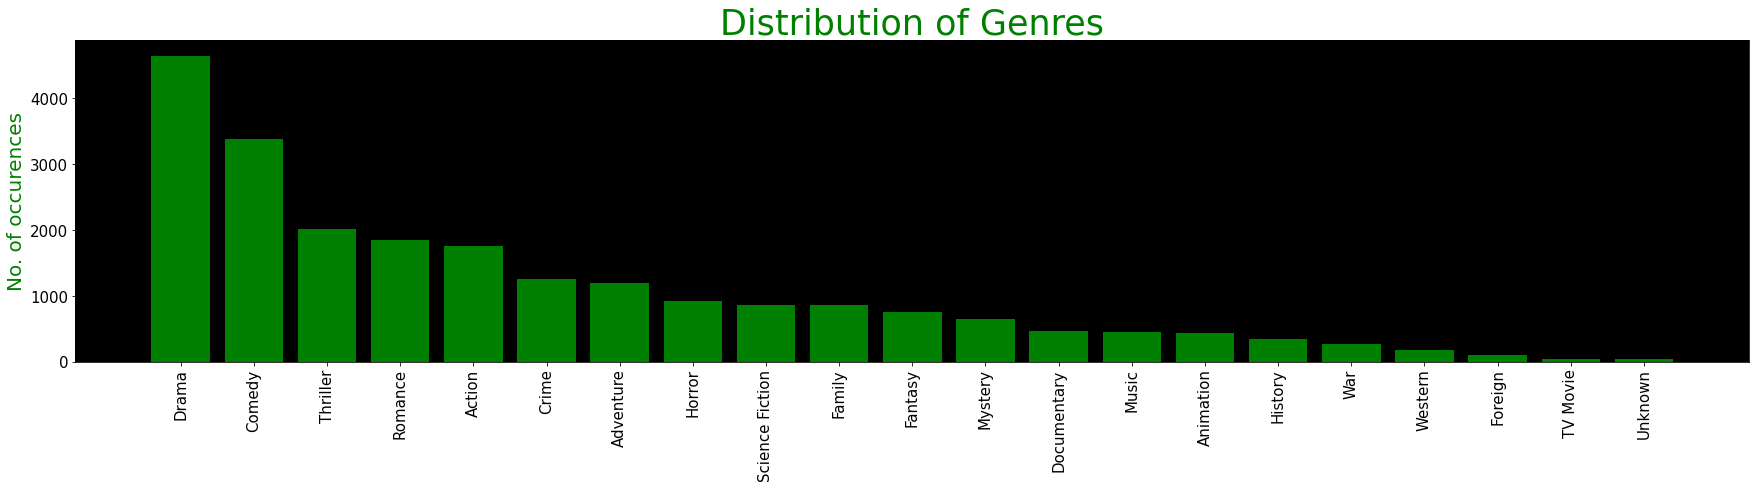

In [8]:
fig = plt.figure(1, figsize=(30,13),facecolor='w')
genre_plot = fig.add_subplot(2,1,2)
genre_plot.set_facecolor((0,0,0))
y_axis = [i[1] for i in genre_type_occurences]
x_axis = [k for k,i in enumerate(genre_type_occurences)]
x_label = [i[0] for i in genre_type_occurences]
plt.xticks(color='k',rotation=90, fontsize = 15)
plt.yticks(fontsize = 15,color='k')
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 20,color='g')
genre_plot.bar(x_axis, y_axis, color='g')
plt.title("Distribution of Genres",color='g',fontsize = 35)
plt.savefig('Genres_Distribution.jpg')
plt.show()

So seeing the bar plot..it's clear that most movies belong to the 'Drama' genre.

 **DISTRIBUTION OF PRODUCTION COUNTRIES IN THE DATASET:** WordCloud is used to see the distribution of countries whose movies are in the dataset.

In [9]:
PH_set = set()
for PH in movies_data['production_countries'].str.split('|').values:
  PH_set = PH_set.union(set(PH))
PHtype_occurences= count_types(movies_data, 'production_countries', PH_set)
len(PHtype_occurences)


96

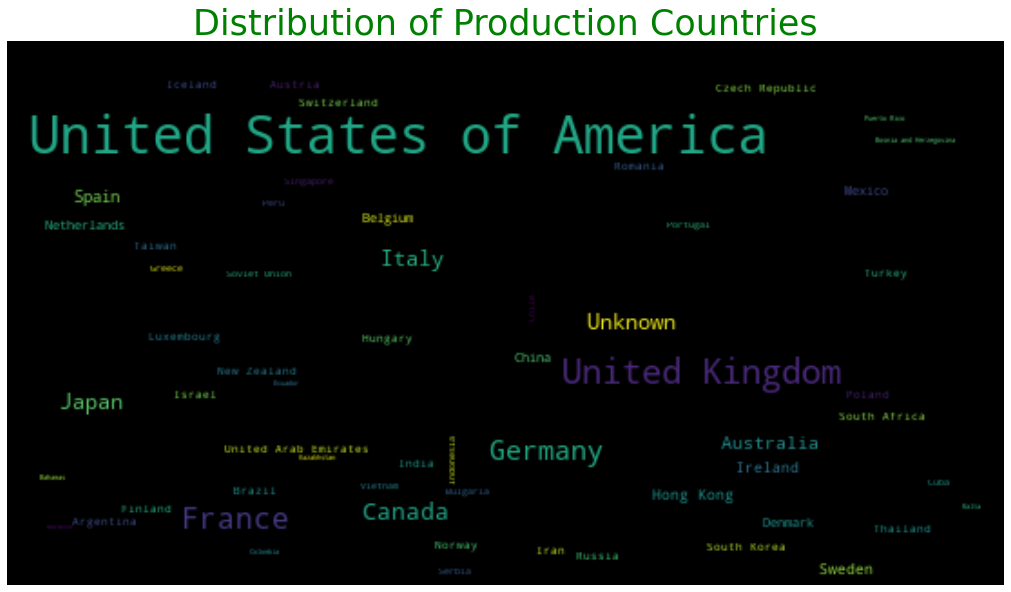

In [10]:
countries = dict()
for s in PHtype_occurences:
    countries[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(30, 10))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.4,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(countries)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Distribution of Production Countries",color='g',fontsize = 35)
plt.axis('off')
plt.savefig('PC_Distribution.jpg')

plt.show()

From the plot..it's clear that movies of 'United States of Kingdom' is huge in numbers. Also there are many movies in the dataset whose country of origin is unknown

 **DISTRIBUTION OF PRODUCTION COMPANIES IN THE DATASET:** WordCloud is used to see the distribution of PHs whose movies are in the dataset.

In [11]:
PHc_set = set()
for PHc in movies_data['production_companies'].str.split('|').values:
  PHc_set = PHc_set.union(set(PHc))
PHctype_occurences= count_types(movies_data, 'production_companies', PHc_set)
len(PHctype_occurences)


7406

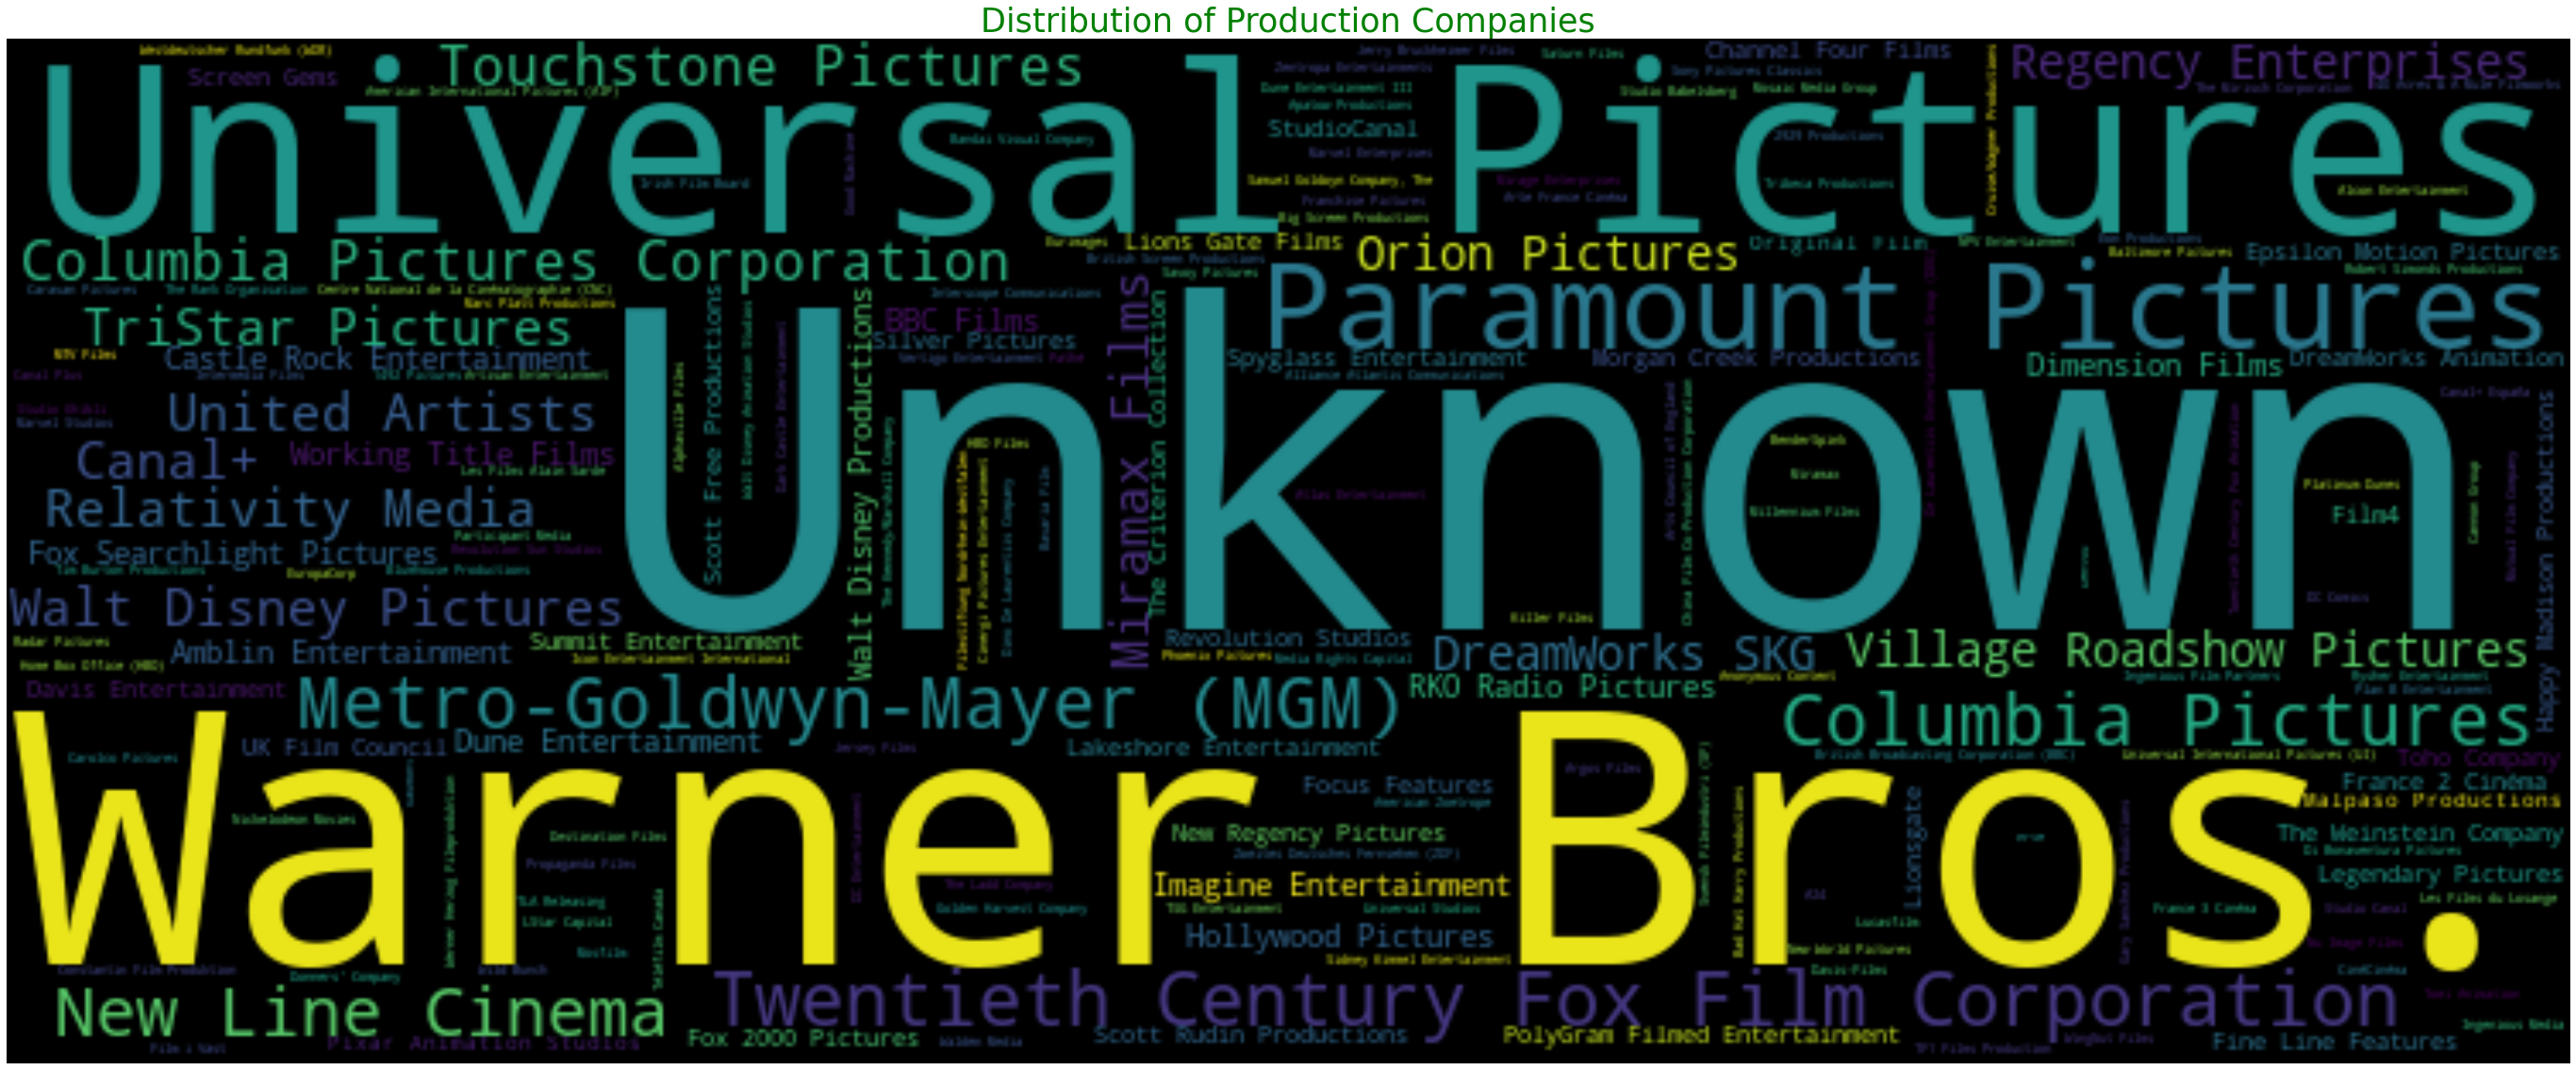

In [12]:
companies = dict()
for s in PHctype_occurences:
    companies[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(50, 20))
wordcloud = WordCloud(width=750,height=300, background_color='black', 
                      max_words=23412,relative_scaling=0.1,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(companies)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Distribution of Production Companies",color='g',fontsize = 35)
plt.axis('off')
plt.savefig('PH_Distribution.jpg')
plt.show()

From the wordcloud it's clear that huge number of movies belong to 'Warner Bros' and also PHs of huge number of movies are unknown.

 **DISTRIBUTION OF YEAR OF RELEASE IN THE DATASET:**

In [13]:
movies_data['release_year'].value_counts()

2000    273
1998    272
1996    271
2002    268
1999    266
       ... 
1915      1
1917      1
1902      1
1918      1
1919      1
Name: release_year, Length: 103, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


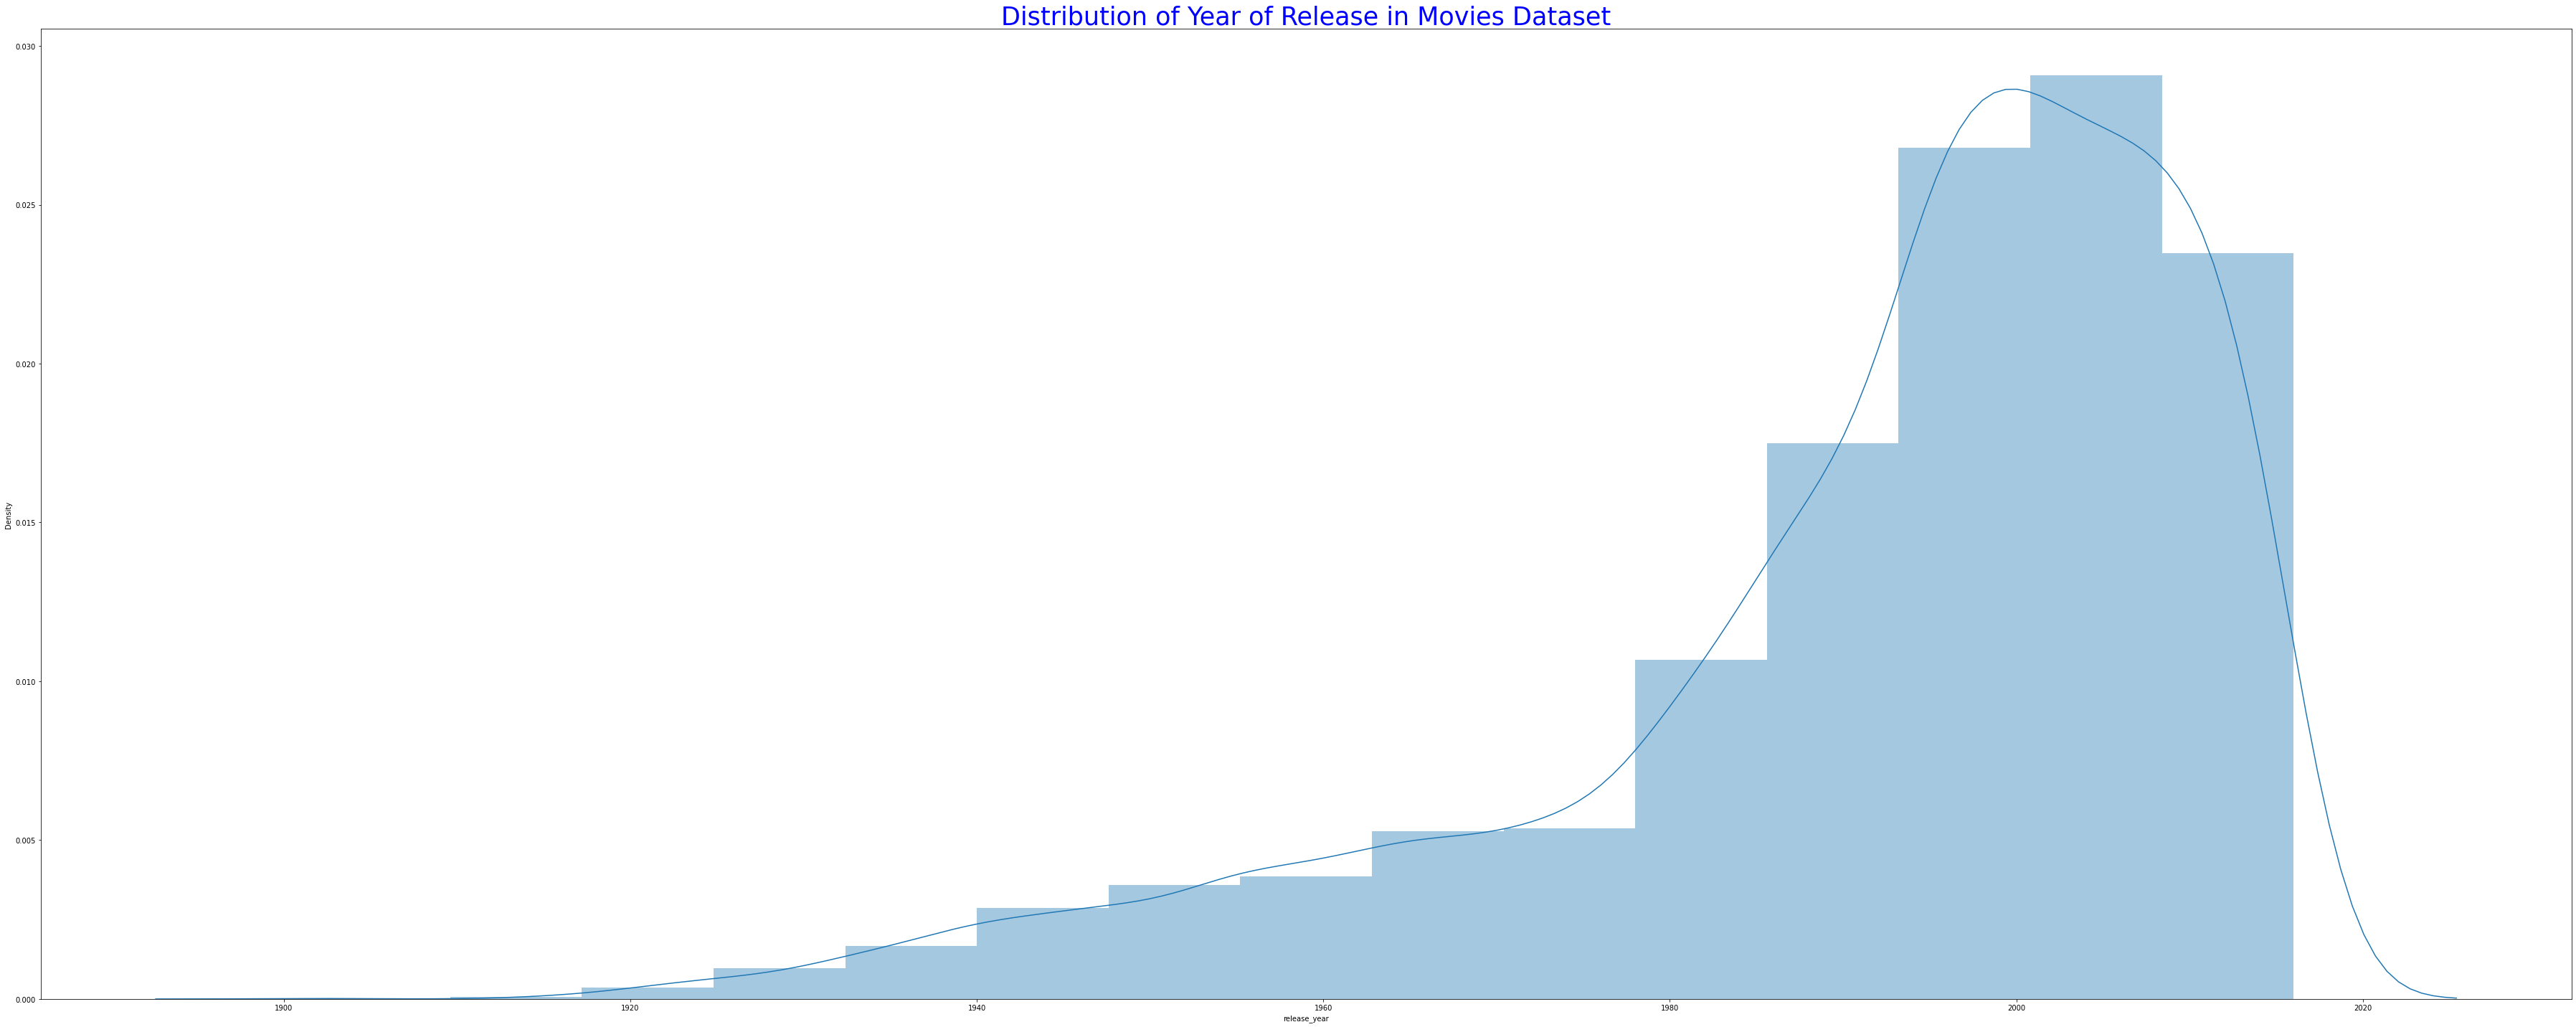

In [14]:
fig, axes = plt.subplots(figsize=(50, 20))
sns.distplot(movies_data['release_year'],bins=15)
plt.title("Distribution of Year of Release in Movies Dataset",color='b',fontsize = 35)
plt.savefig('Year_Distribution.jpg')
plt.tight_layout()

So most of the movies are from the period '2000' to '2020'.

 **DISTRIBUTION OF DAY OF RELEASE IN THE DATASET:**

In [15]:
day_set = set()
for day in movies_data['release_day'].str.split('|').values:
  day_set = day_set.union(set(day))
day_type_occurences= count_types(movies_data, 'release_day', day_set)

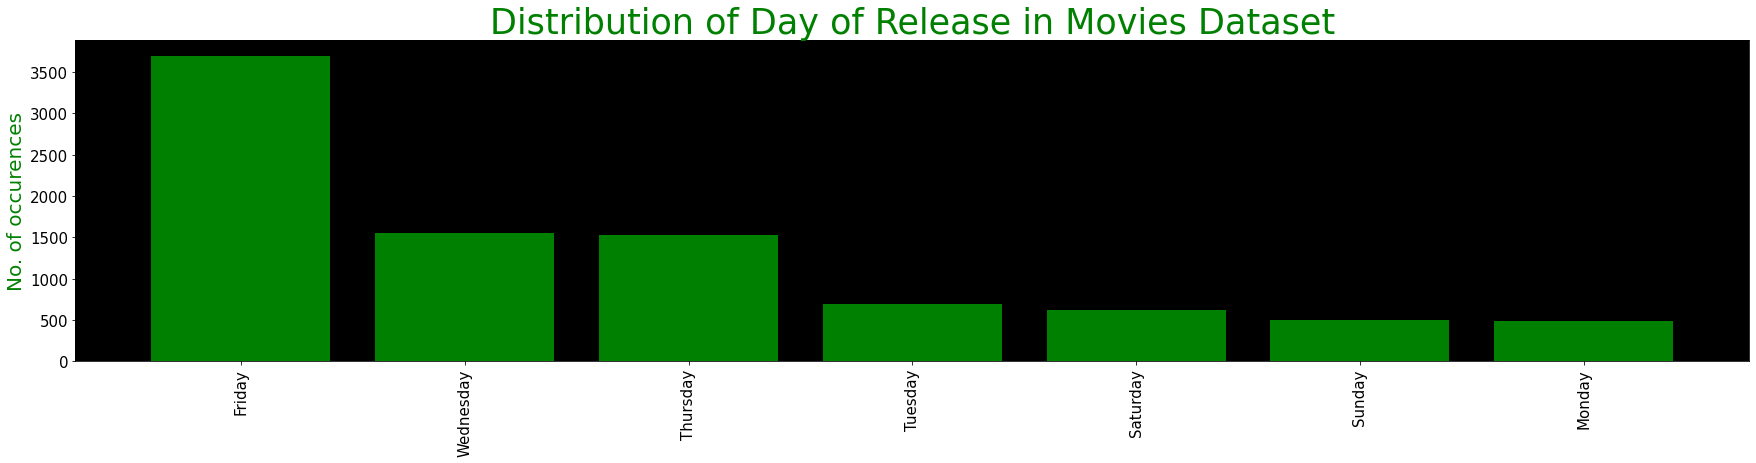

In [16]:
fig = plt.figure(1, figsize=(30,13),facecolor='w')
day_plot = fig.add_subplot(2,1,2)
day_plot.set_facecolor((0,0,0))
y_axis = [i[1] for i in day_type_occurences]
x_axis = [k for k,i in enumerate(day_type_occurences)]
x_label = [i[0] for i in day_type_occurences]
plt.xticks(color='k',rotation=90, fontsize = 15)
plt.yticks(fontsize = 15,color='k')
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 20,color='g')
day_plot.bar(x_axis, y_axis, color='g')
plt.title("Distribution of Day of Release in Movies Dataset",color='g',fontsize = 35)
plt.savefig('Days_Distribution.jpg')
plt.show()

Most of the movies in the dataset released on Friday

 **DISTRIBUTION OF ACTORS IN THE DATASET:** WordCloud is used to see the distribution of actors whose movies are in the dataset.

In [17]:
actor_set = set()
for actor in movies_data['cast'].str.split('|').values:
  actor_set = actor_set.union(set(actor))
actor_type_occurences= count_types(movies_data, 'cast', actor_set)
len(actor_type_occurences)


81316

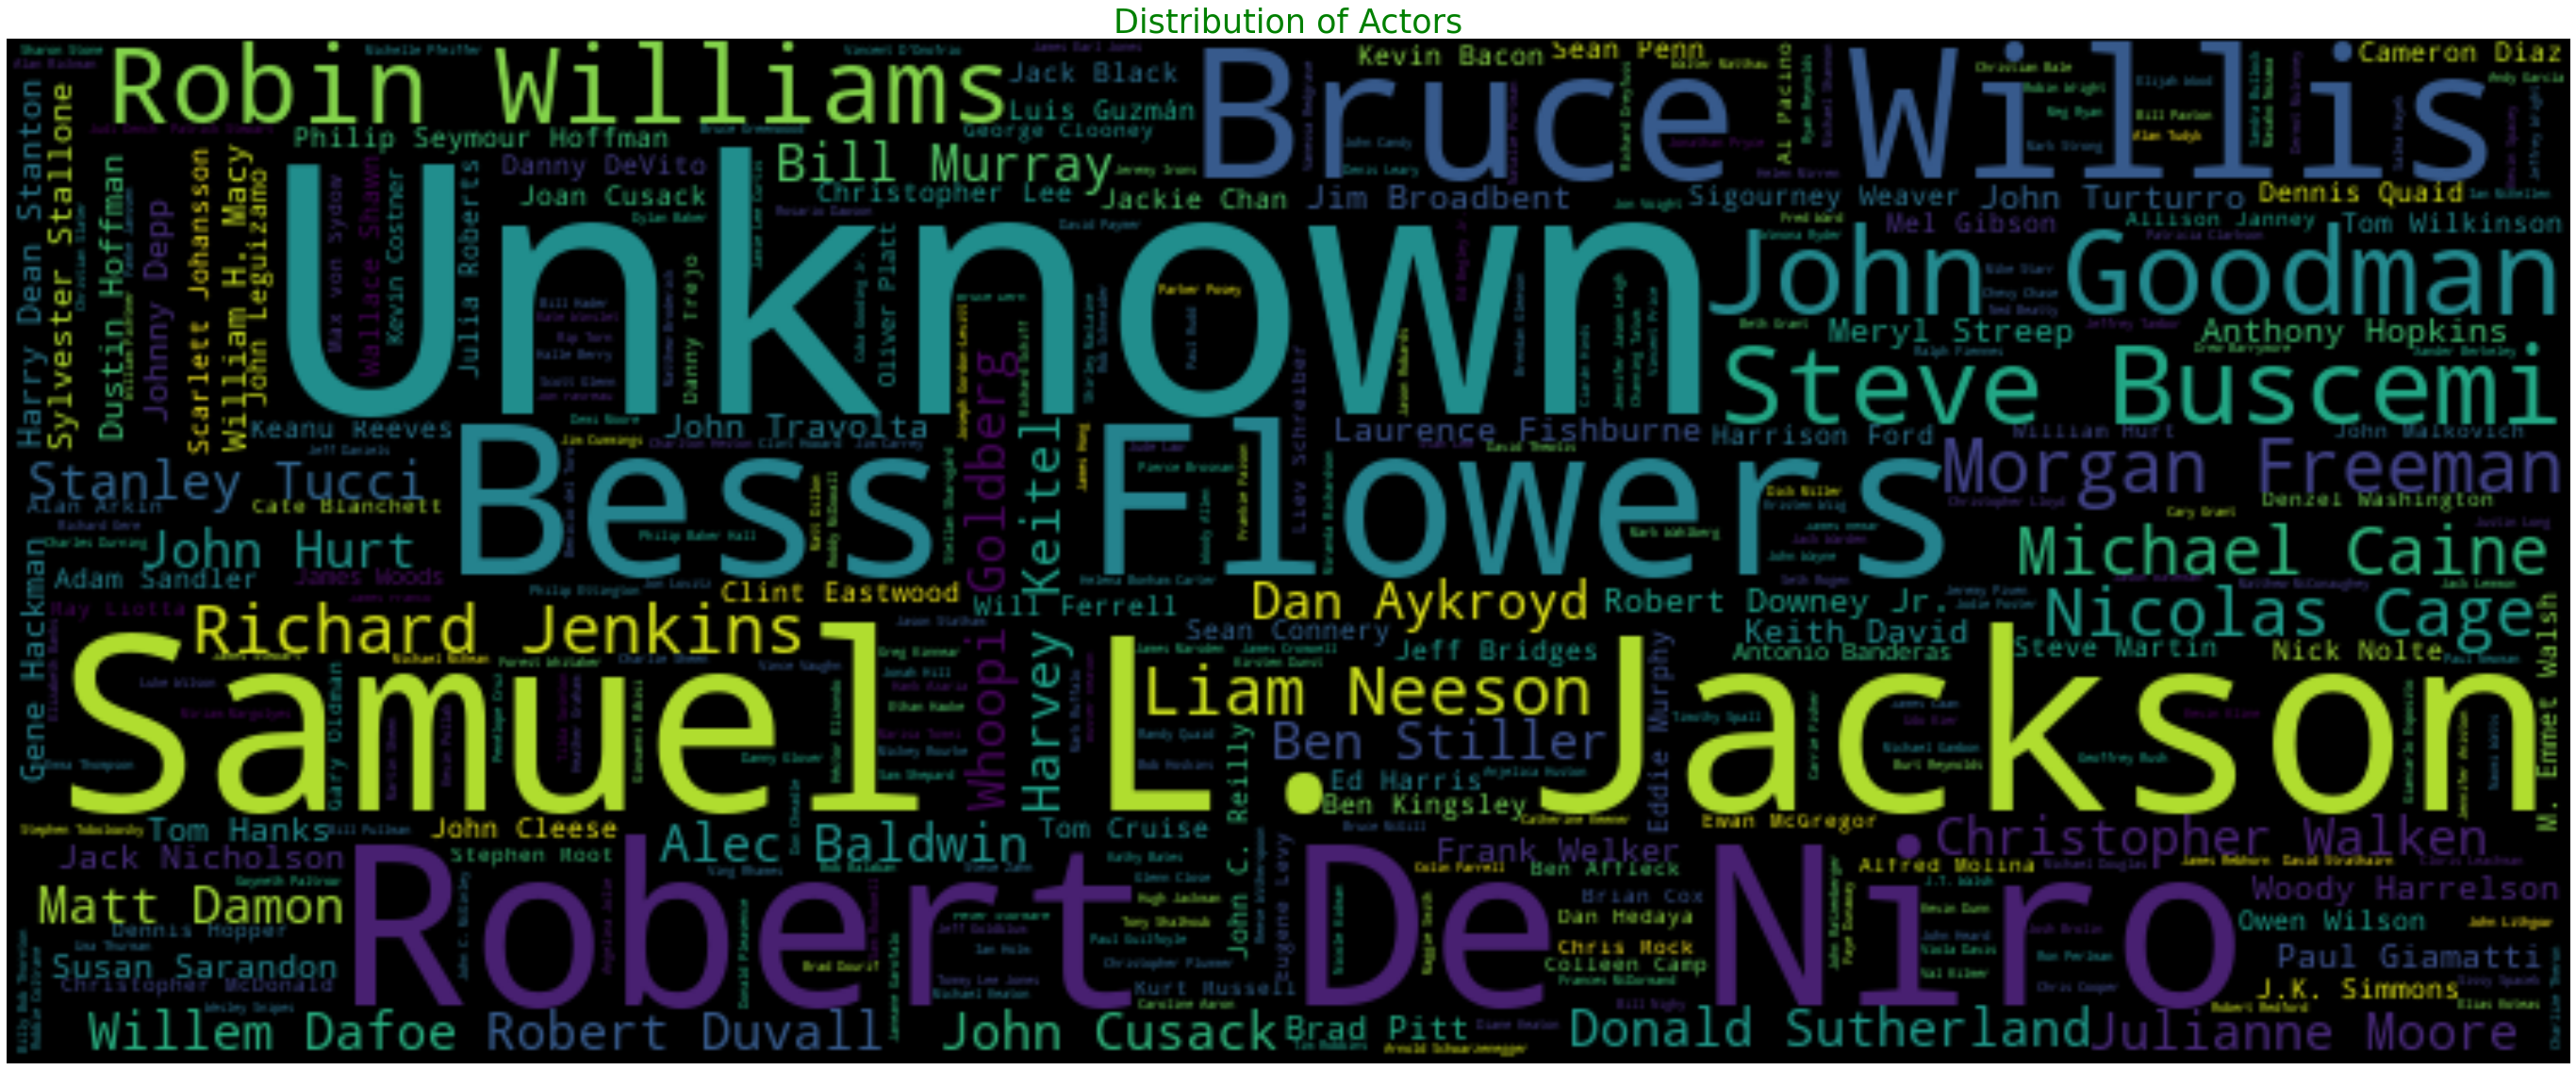

In [18]:
actors = dict()
for s in actor_type_occurences:
    actors[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(50, 20))
wordcloud = WordCloud(width=750,height=300, background_color='black', 
                      max_words=201644,relative_scaling=0.4,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(actors)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Distribution of Actors",color='g',fontsize = 35)
plt.axis('off')
plt.savefig('Actors_Distribution.jpg')
plt.show()

Trying to search for **Hrithik Roshan** in the wordcloud. Seems there are very less of his movies here! :(

In [19]:
def types_count(data,column,array):
  type_count=dict()
  for item in array:
    type_count[item]=0
  for types in movies_data[column]:
    type_count[types] += 1
  type_occurences = []
  for k,v in type_count.items():
    type_occurences.append([k,v])
  type_occurences.sort(key = lambda x:x[1], reverse = True)
  return type_occurences

 **DISTRIBUTION OF DIRECTORS IN THE DATASET:** WordCloud is used to see the distribution of Directors whose movies are in the dataset.

In [20]:
director_list = []
for director in movies_data['director'].unique():
  director_list.append(director)
director_type_occurences= count_types(movies_data, 'director', director_list)
len(director_type_occurences)


3602

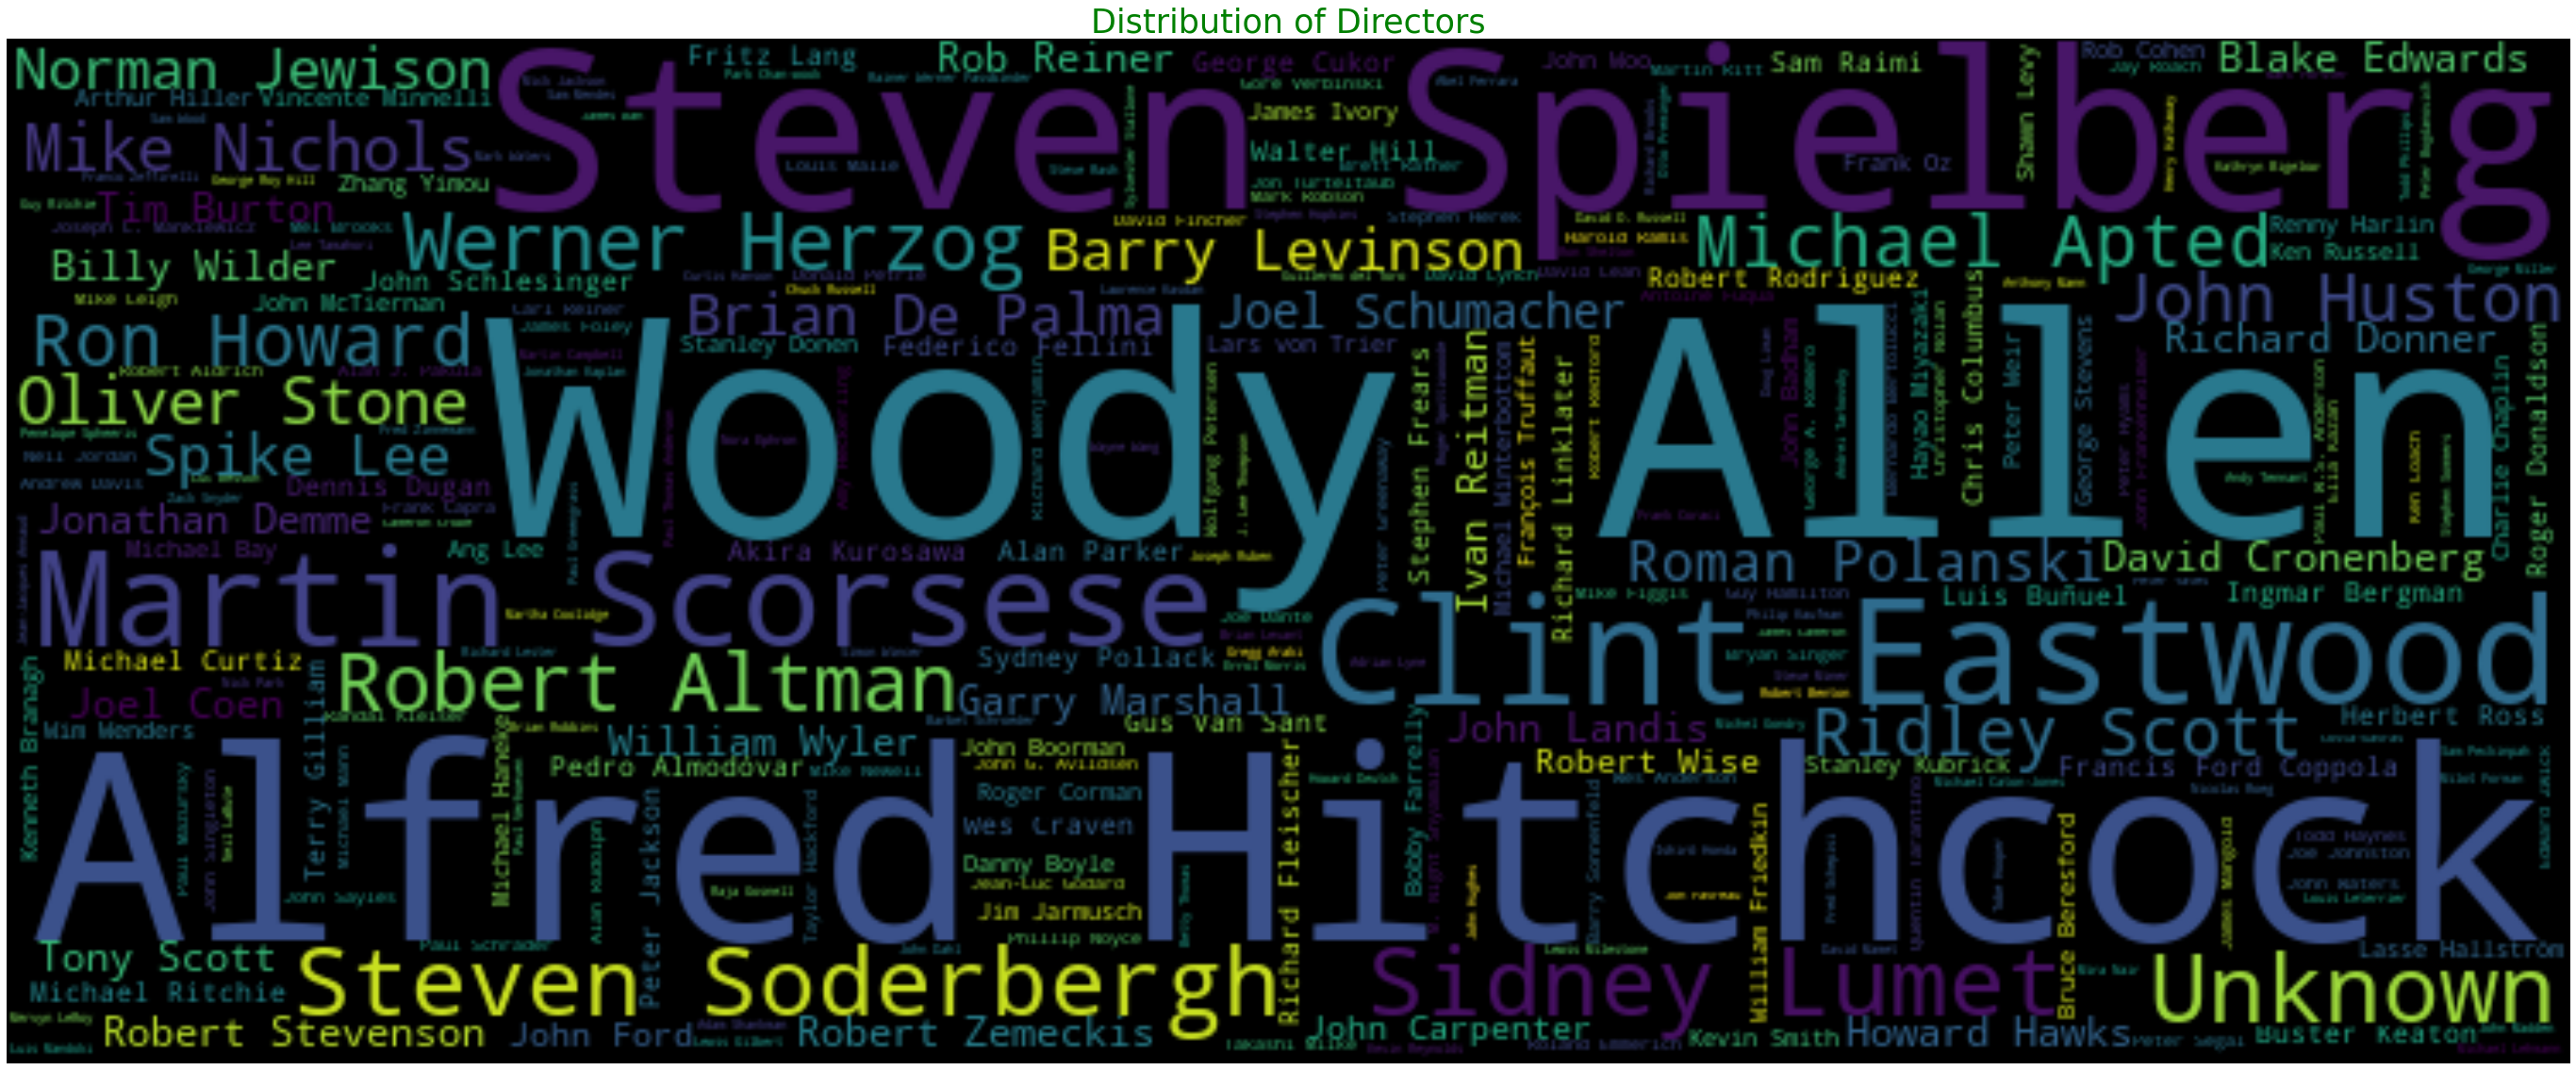

In [21]:
directors = dict()
for s in director_type_occurences:
    directors[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(50, 20))
wordcloud = WordCloud(width=750,height=300, background_color='black', 
                      max_words=17435,relative_scaling=0.4,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(directors)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Distribution of Directors",color='g',fontsize = 35)
plt.axis('off')
plt.savefig('Directors_Distribution.jpg')
plt.show()

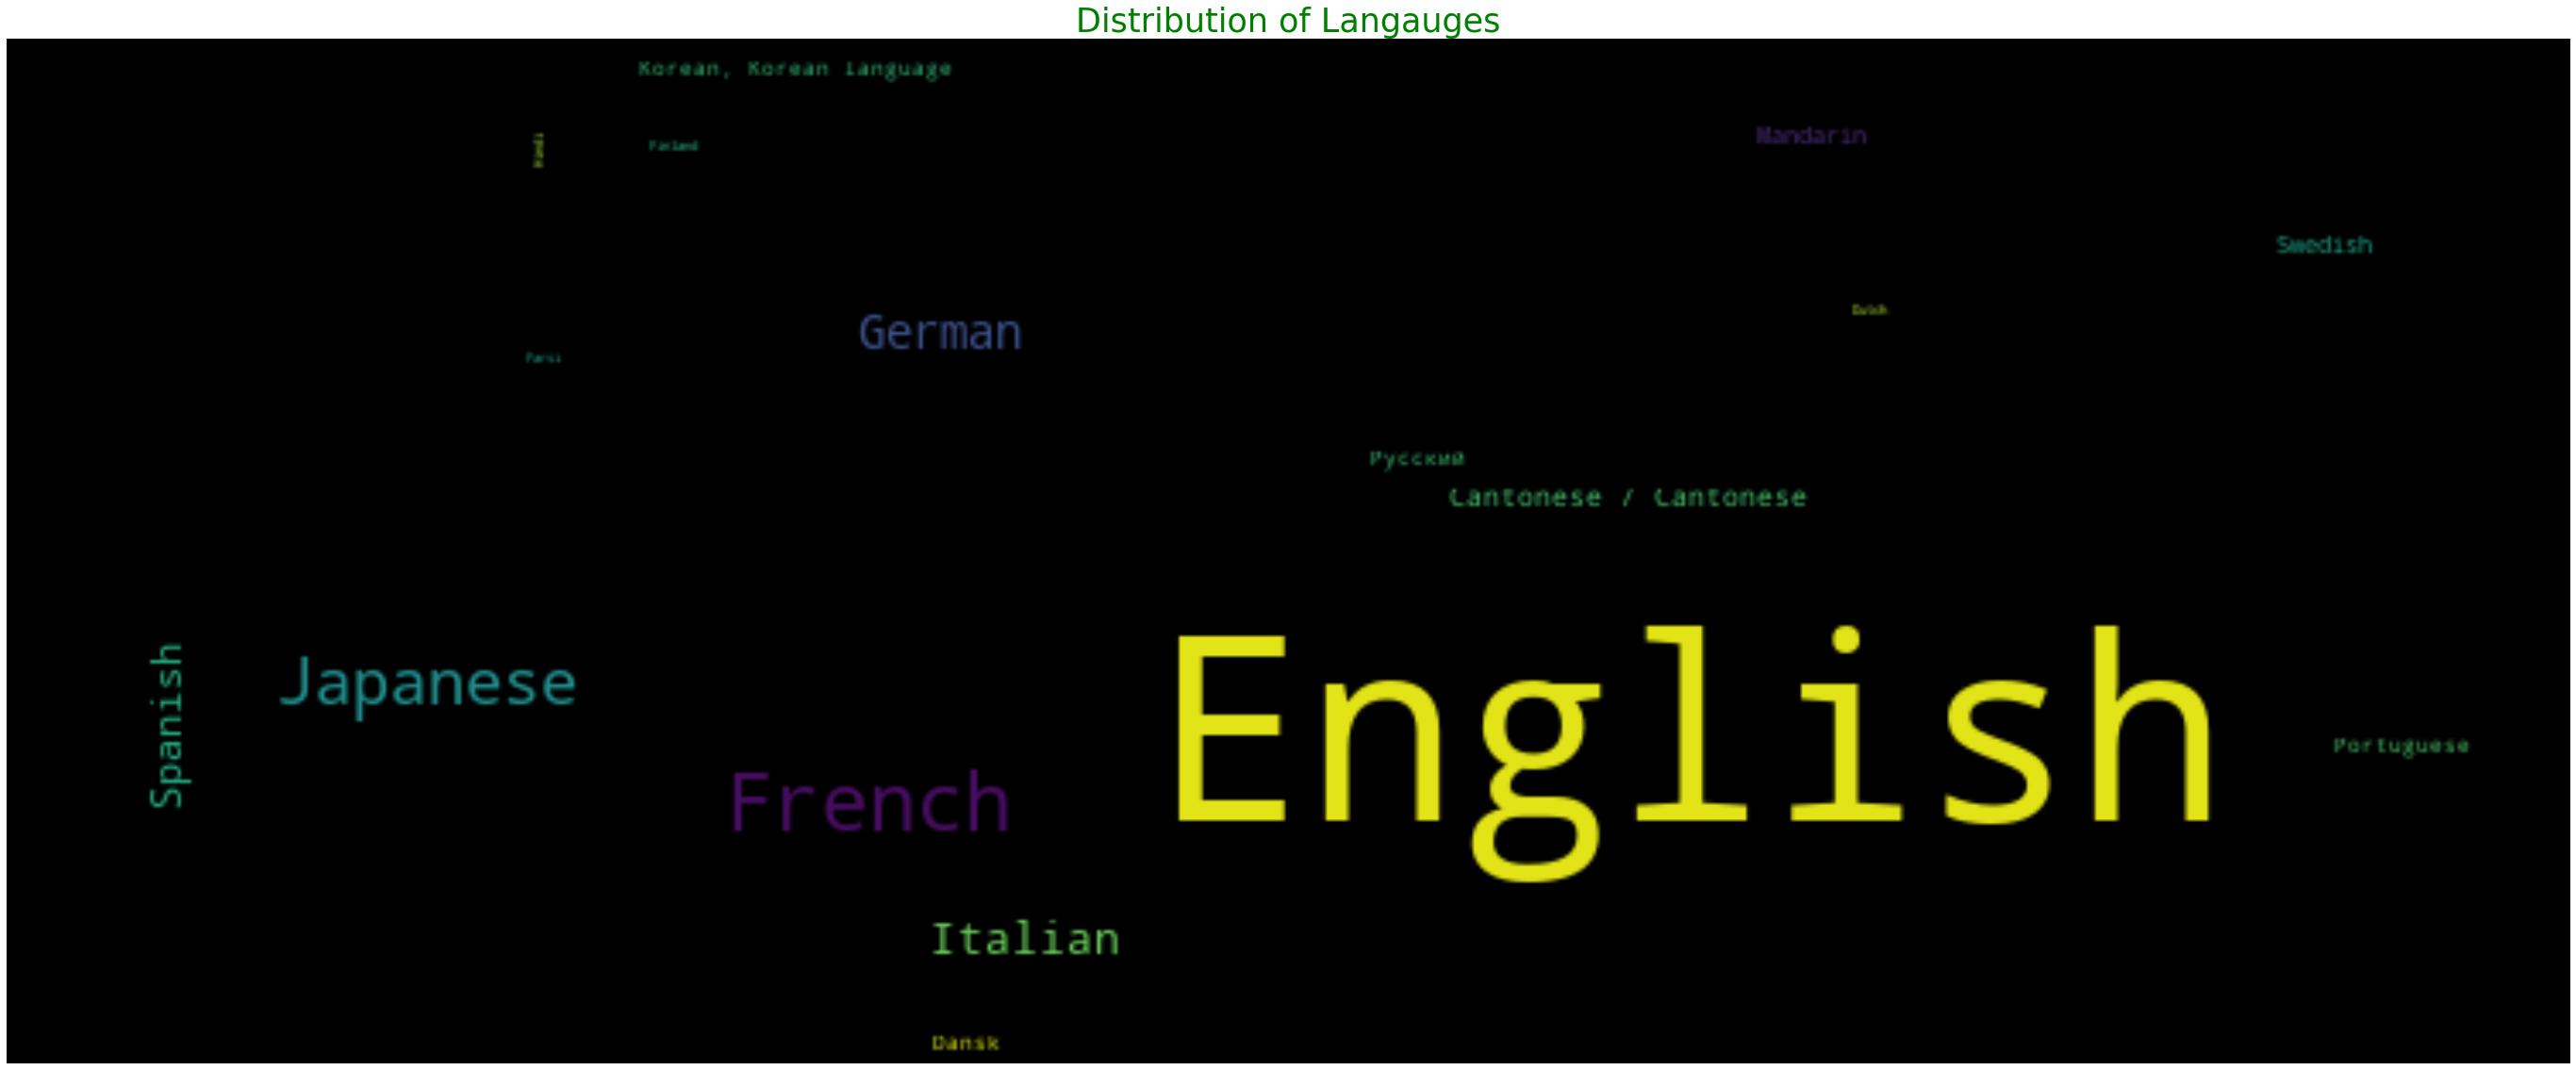

In [22]:
language_list = []
for language in movies_data['original_language'].unique():
  language_list.append(language)
language_type_occurences= count_types(movies_data, 'original_language', language_list)
language = dict()
for s in language_type_occurences:
    language[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(50, 20))
wordcloud = WordCloud(width=750,height=300, background_color='black', 
                      max_words=69,relative_scaling=0.7,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(language)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Distribution of Langauges",color='g',fontsize = 35)
plt.axis('off')
plt.savefig('Langs_Distribution.jpg')

plt.show()


**CORRELATION BETWEEN THE COLUMNS BUDGET, PROFIT, REVENUE, RUNTIME, VOTE_COUNT, VOTE_AVERAGE, RATING_COUNT, MEAN_RATING AND RELEASE YEAR:**

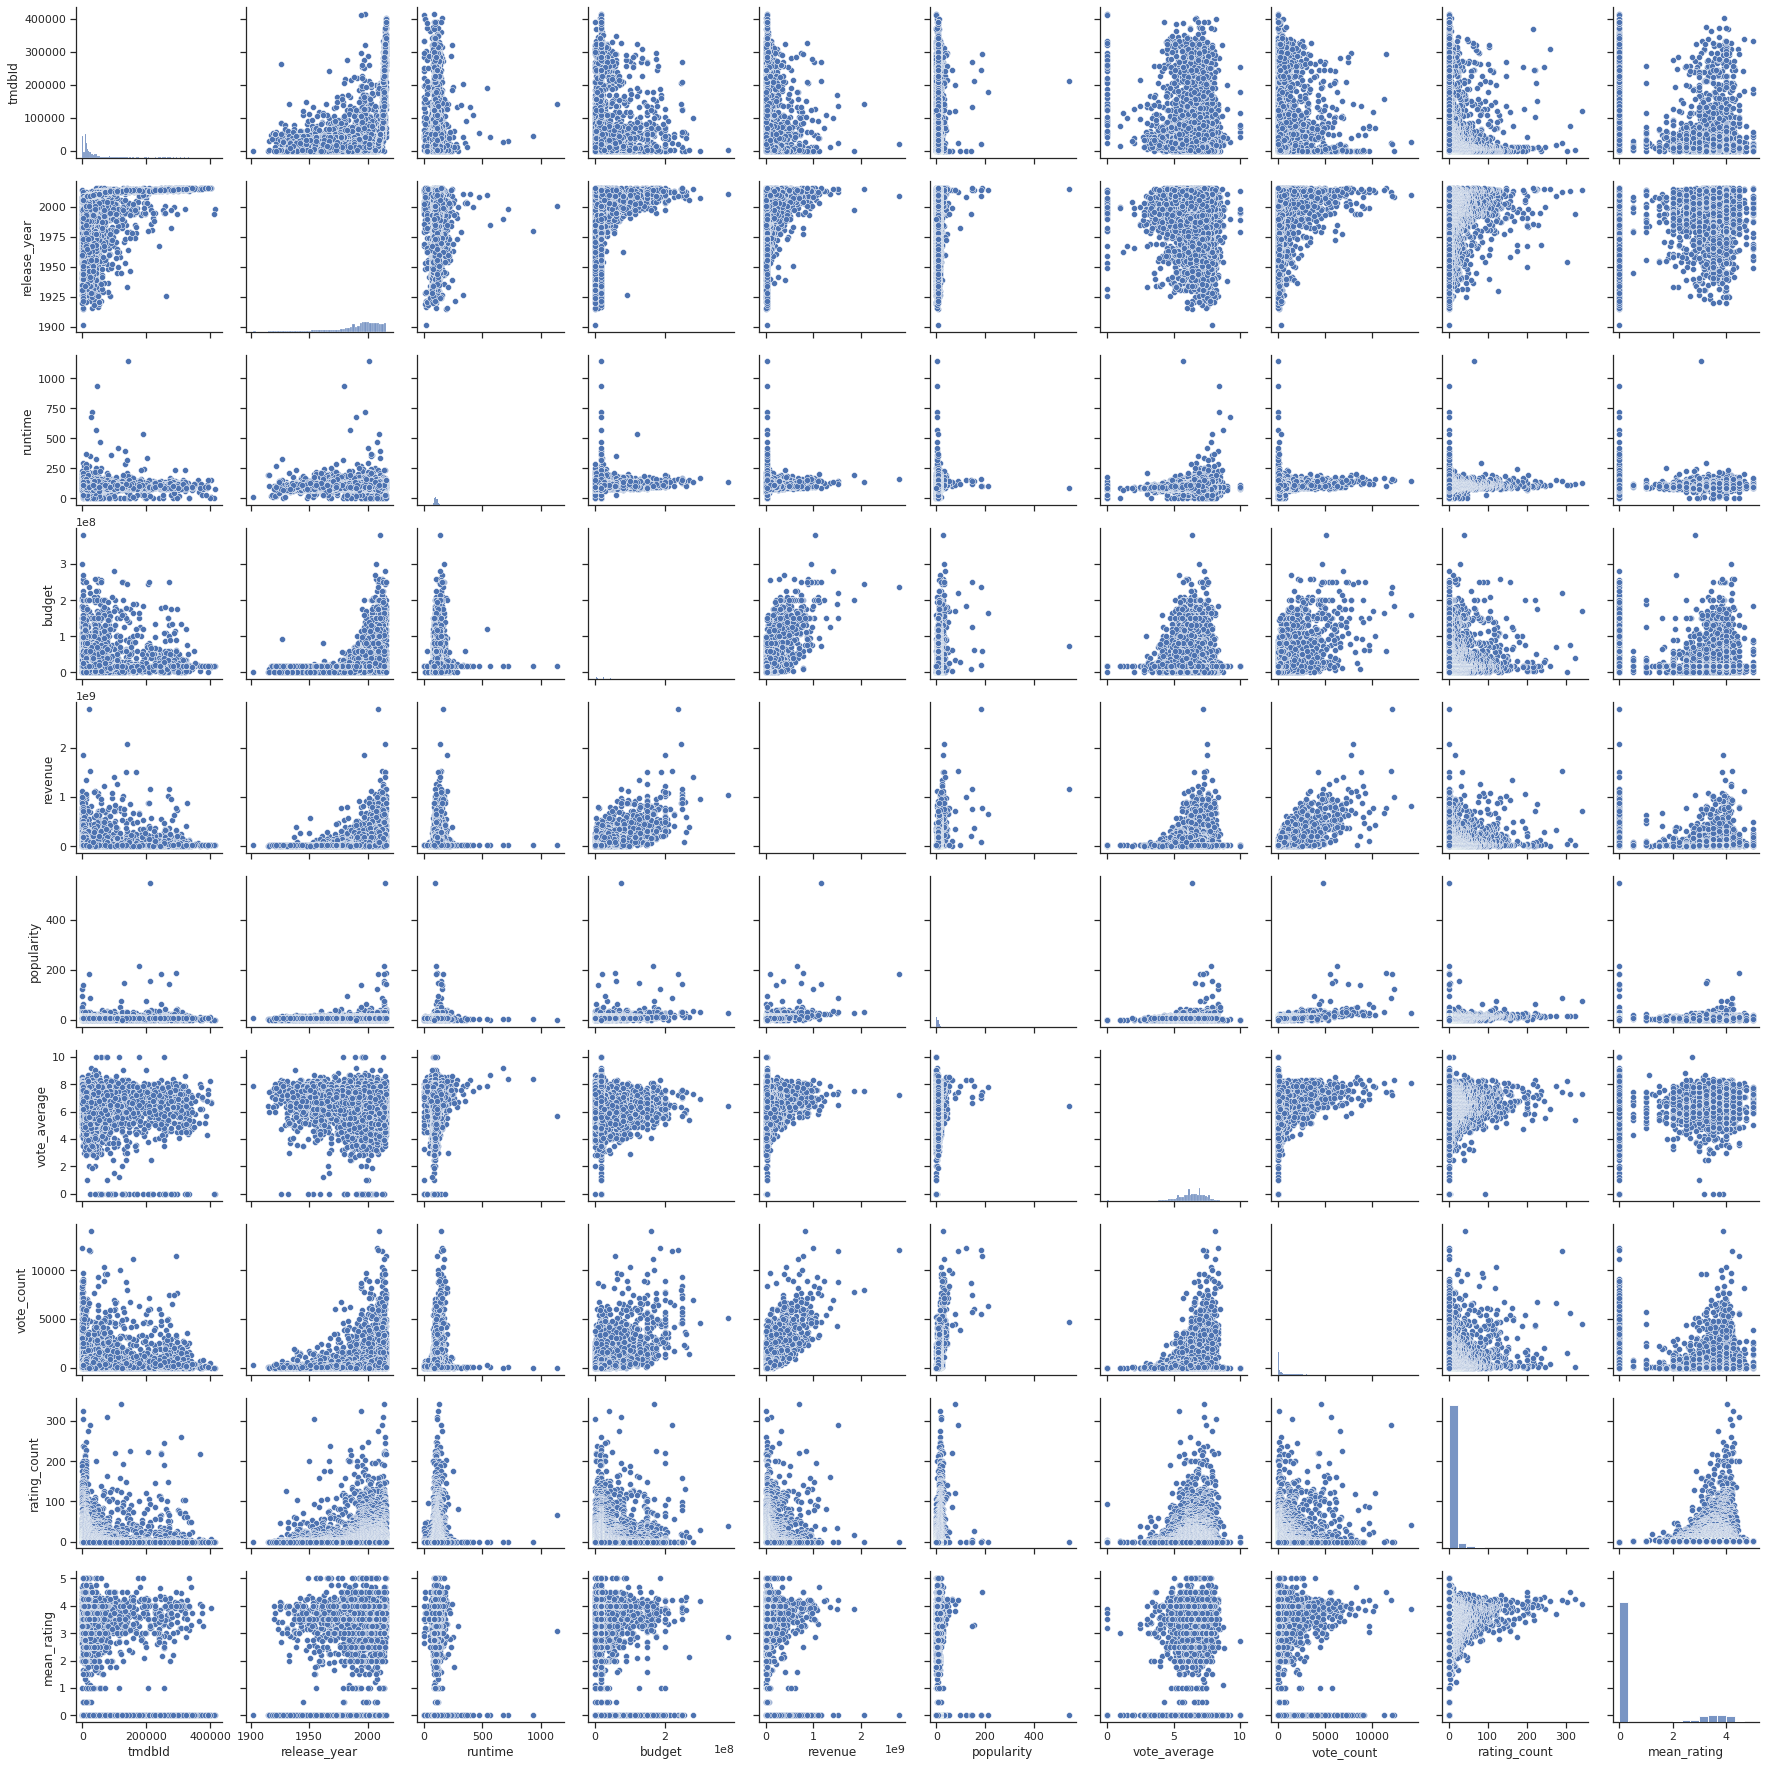

In [23]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(movies_data)
plt.savefig('Correlation_plot.jpg')

**TOP 20 MOVIES BASED ON POPULARITY :**

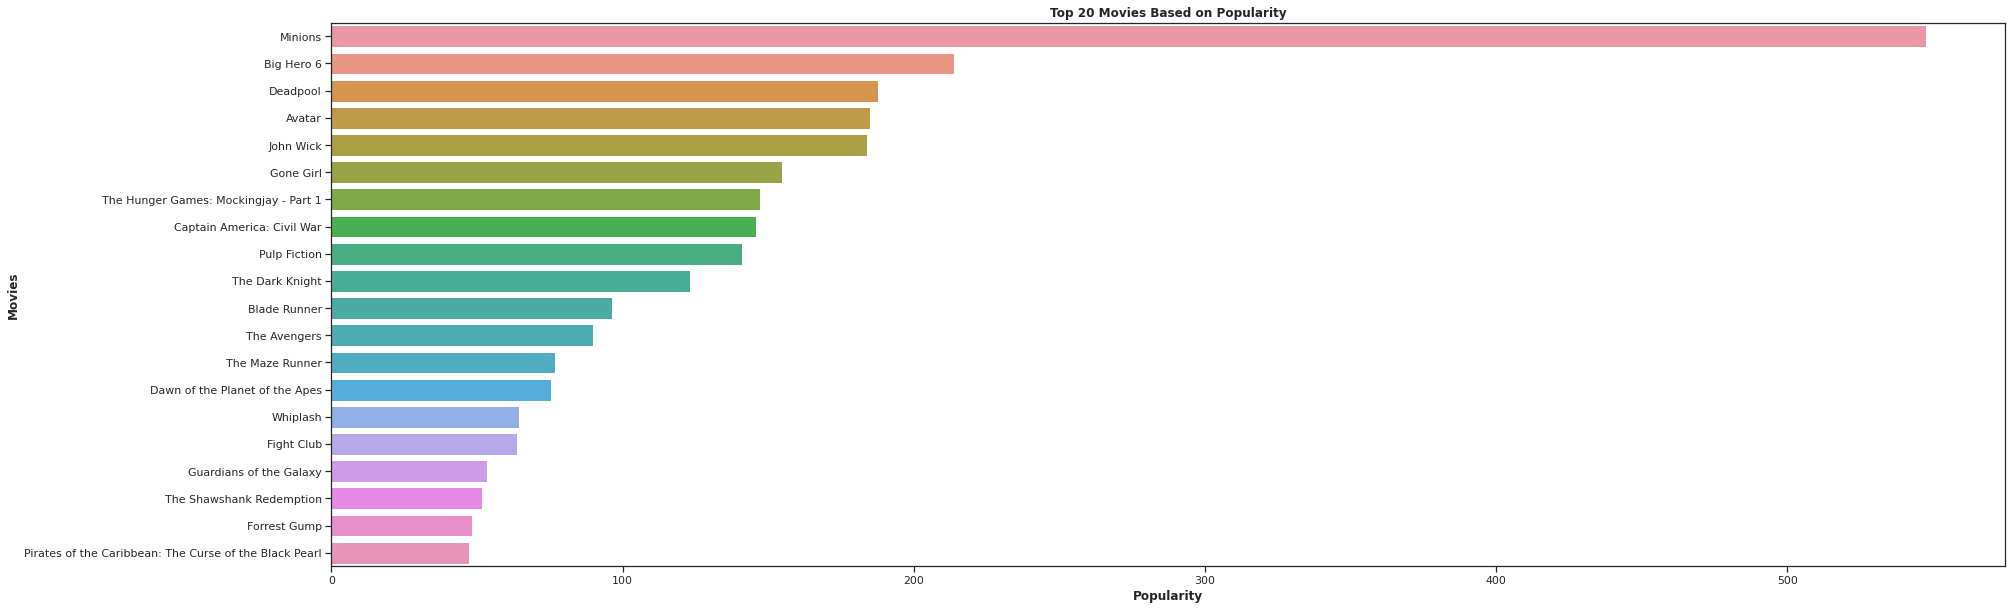

In [24]:
popularity_sort=movies_data.sort_values('popularity',ascending=False)
plt.figure(figsize=(30,10))
axis=sns.barplot(x=popularity_sort['popularity'].head(20),y=popularity_sort['title'].head(20))
plt.title('Top 20 Movies Based on Popularity',weight='bold')
plt.xlabel('Popularity',weight='bold')
plt.ylabel('Movies',weight='bold')
plt.savefig('Movie_popularity.jpg')

**TOP 20 MOVIES BASED ON VOTE COUNTS :**

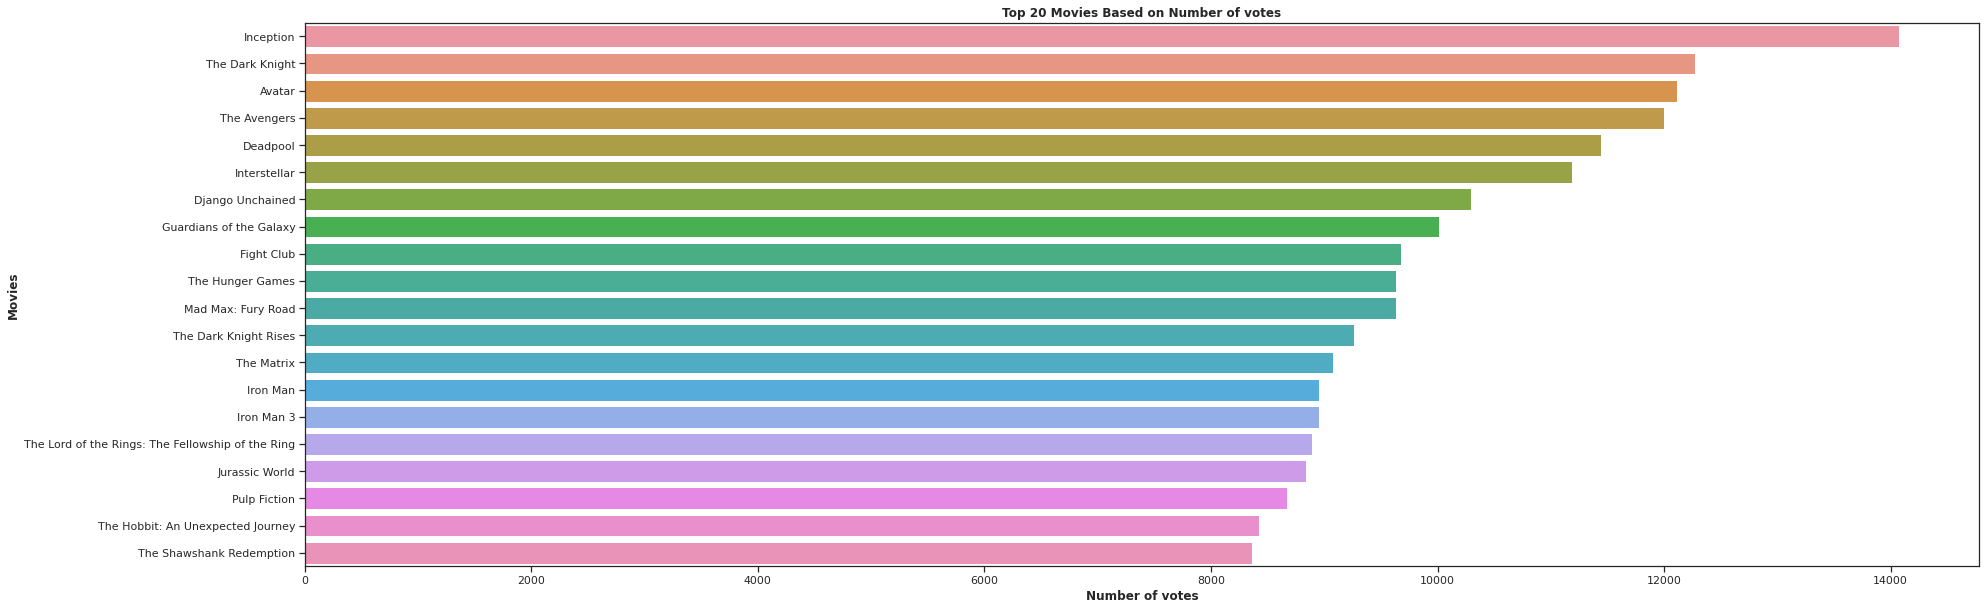

In [25]:
votecount_sort=movies_data.sort_values('vote_count',ascending=False)
plt.figure(figsize=(30,10))
axis=sns.barplot(x=votecount_sort['vote_count'].head(20),y=votecount_sort['title'].head(20))
plt.title('Top 20 Movies Based on Number of votes',weight='bold')
plt.xlabel('Number of votes',weight='bold')
plt.ylabel('Movies',weight='bold')
plt.savefig('Movie_votecount.jpg')

**TOP 20 MOVIES BASED ON NUMBER OF RATINGS RECIEVED:**

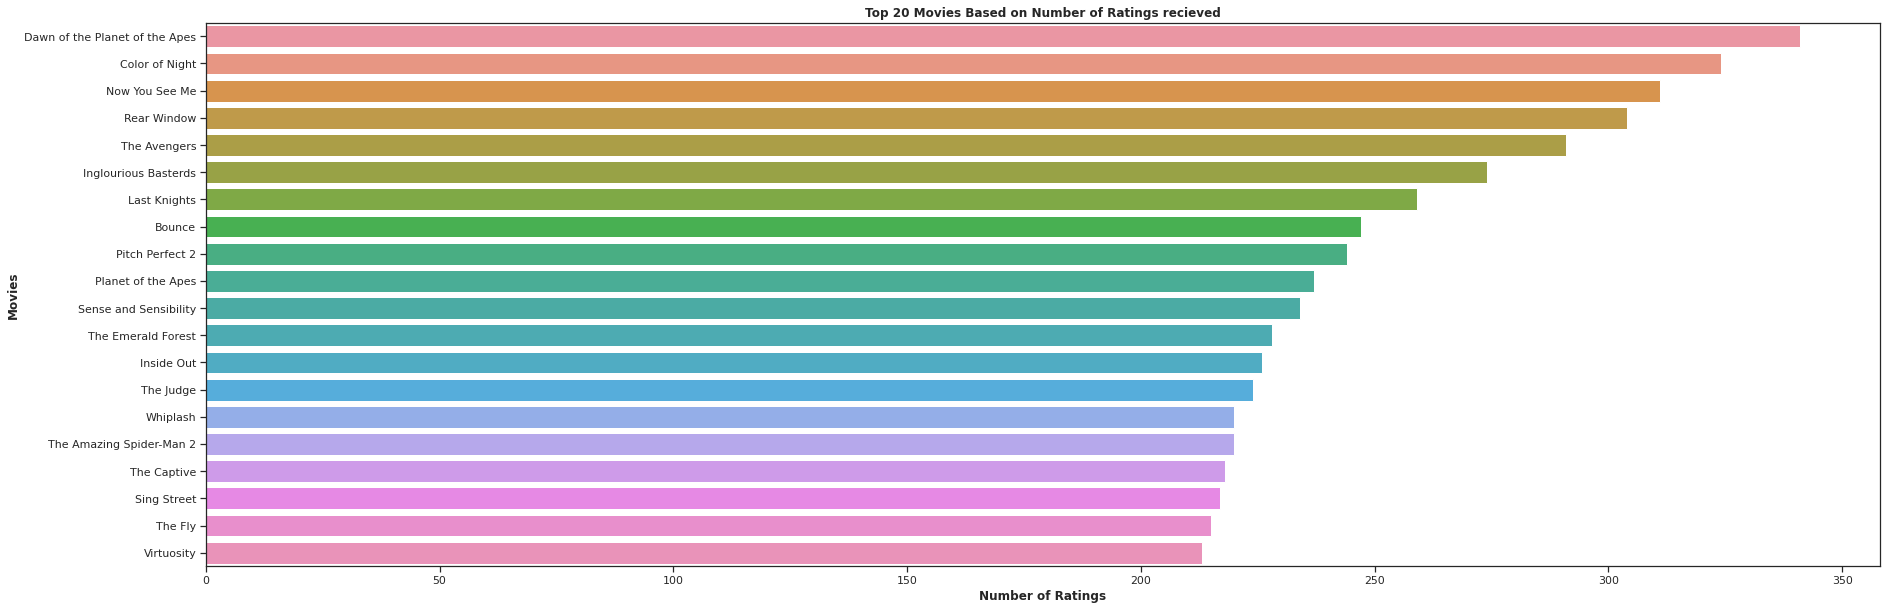

In [26]:
ratingcount_sort=movies_data.sort_values('rating_count',ascending=False)
plt.figure(figsize=(30,10))
axis=sns.barplot(x=ratingcount_sort['rating_count'].head(20),y=ratingcount_sort['title'].head(20))
plt.title('Top 20 Movies Based on Number of Ratings recieved',weight='bold')
plt.xlabel('Number of Ratings',weight='bold')
plt.ylabel('Movies',weight='bold')
plt.savefig('Movie_ratingcount.jpg')

**TOP 20 MOVIES BASED ON AVERAGE OF ALL VOTES RECIEVED:**

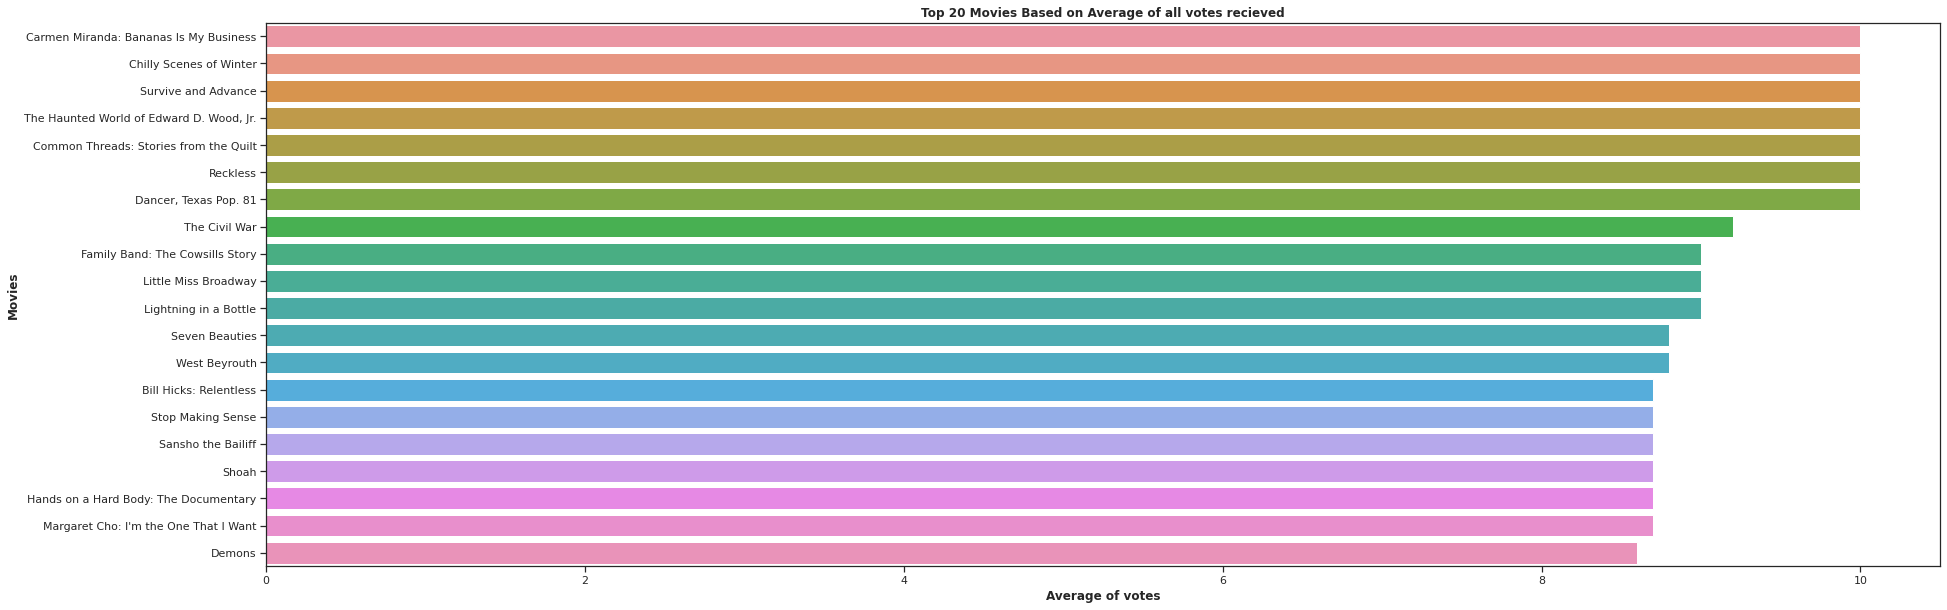

In [27]:
voteaverage_sort=movies_data.sort_values('vote_average',ascending=False)
plt.figure(figsize=(30,10))
axis=sns.barplot(x=voteaverage_sort['vote_average'].head(20),y=voteaverage_sort['title'].head(20))
plt.title('Top 20 Movies Based on Average of all votes recieved',weight='bold')
plt.xlabel('Average of votes',weight='bold')
plt.ylabel('Movies',weight='bold')
plt.savefig('Movie_voteaverage.jpg')

**TOP 20 MOVIES BASED ON MEAN OF RATINGS RECIEVED**

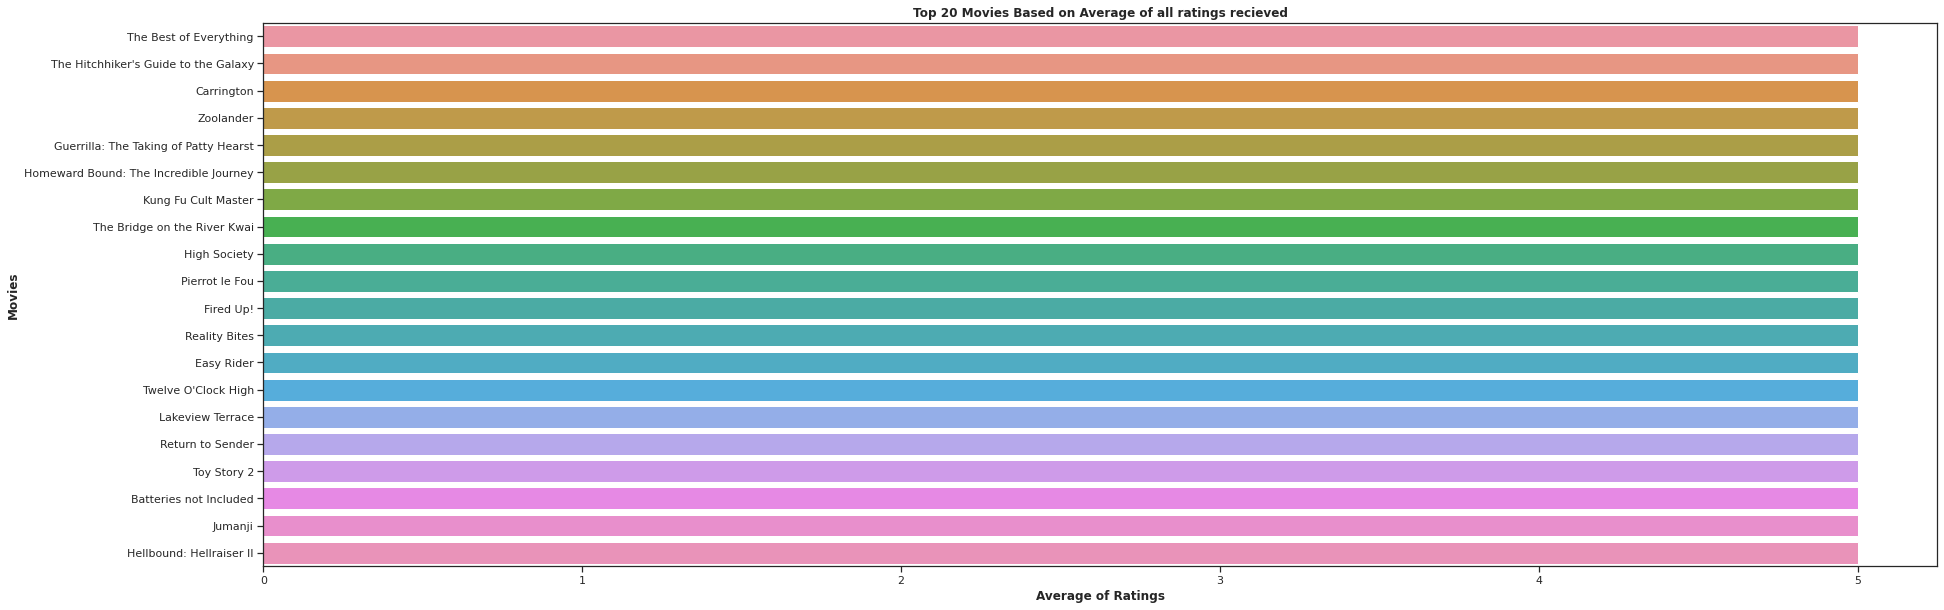

In [28]:
ratingaverage_sort=movies_data.sort_values('mean_rating',ascending=False)
plt.figure(figsize=(30,10))
axis=sns.barplot(x=ratingaverage_sort['mean_rating'].head(20),y=ratingaverage_sort['title'].head(20))
plt.title('Top 20 Movies Based on Average of all ratings recieved',weight='bold')
plt.xlabel('Average of Ratings',weight='bold')
plt.ylabel('Movies',weight='bold')
plt.savefig('Movie_ratingaverage.jpg')

**TOP 20 HIGH BUDGET MOVIES:**

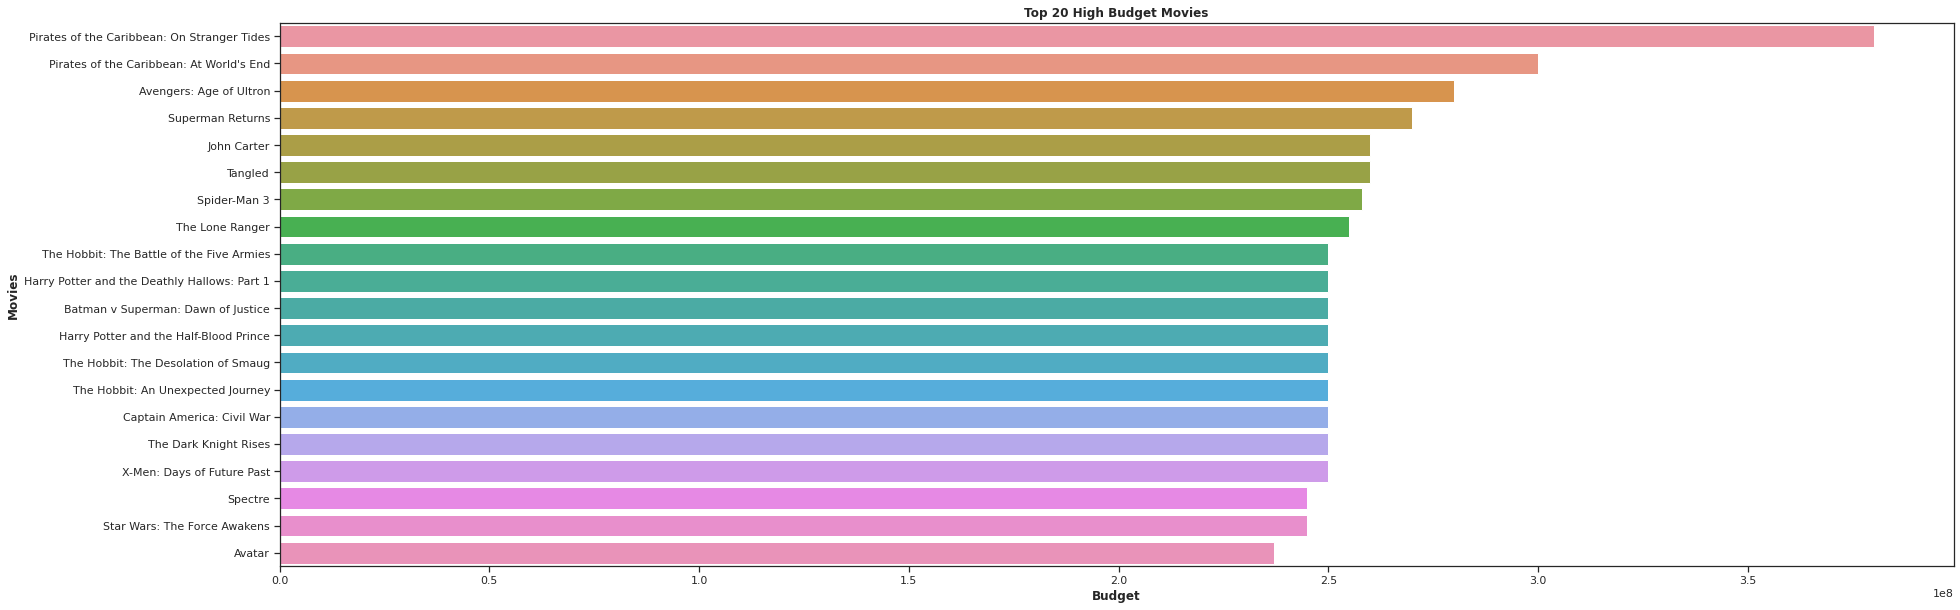

In [29]:
budget_sort=movies_data.sort_values('budget',ascending=False)
plt.figure(figsize=(30,10))
axis=sns.barplot(x=budget_sort['budget'].head(20),y=budget_sort['title'].head(20))
plt.title('Top 20 High Budget Movies',weight='bold')
plt.xlabel('Budget',weight='bold')
plt.ylabel('Movies',weight='bold')
plt.savefig('Movie_budget.jpg')

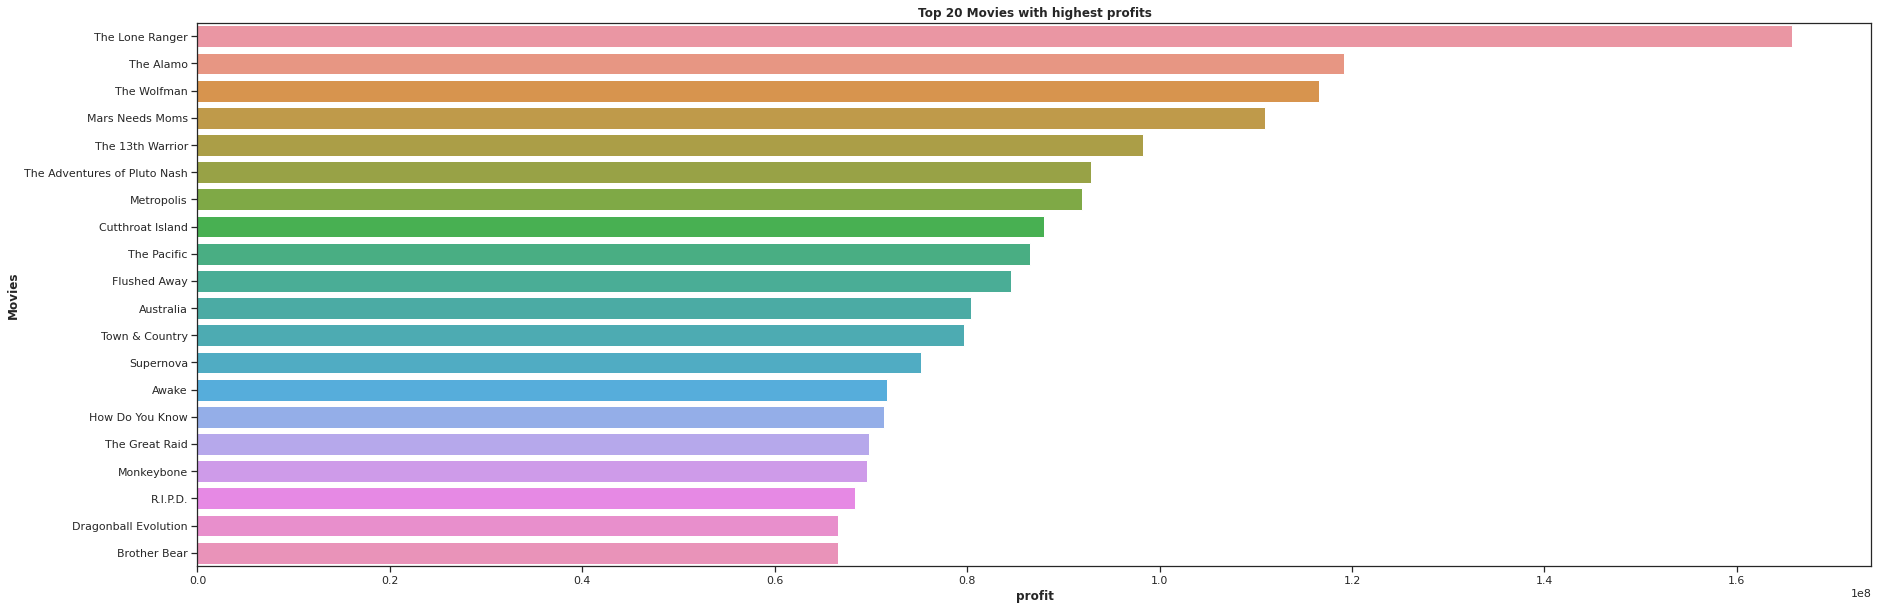

In [30]:
movies_data['profit']=movies_data['budget']-movies_data['revenue']
profit_sort=movies_data.sort_values('profit',ascending=False)
plt.figure(figsize=(30,10))
axis=sns.barplot(x=profit_sort['profit'].head(20),y=profit_sort['title'].head(20))
plt.title('Top 20 Movies with highest profits',weight='bold')
plt.xlabel('profit',weight='bold')
plt.ylabel('Movies',weight='bold')
plt.savefig('Movie_profit.jpg')

**TOP 20 DRAMA MOVIES BASED ON POPULARITY:**

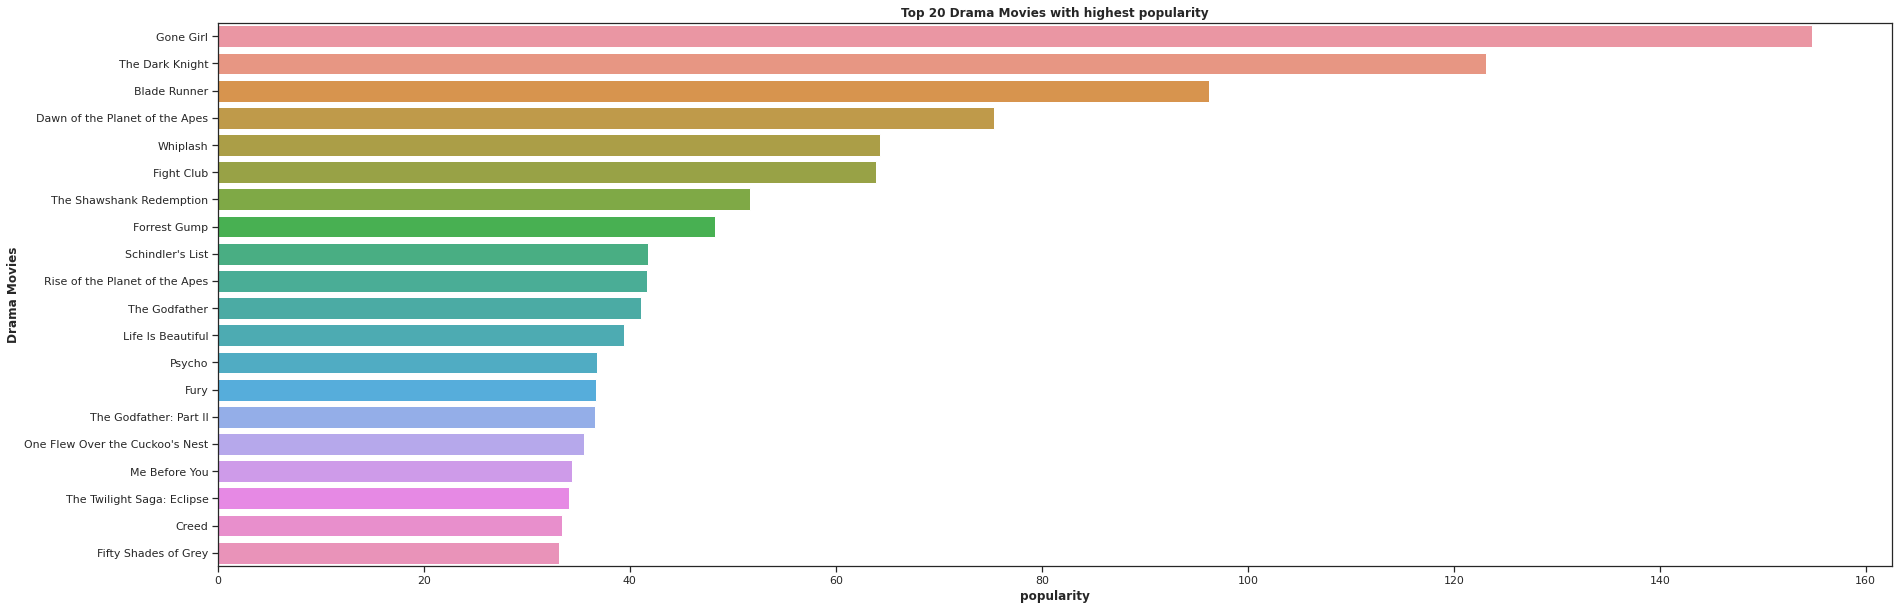

In [31]:
drama_movies_popularity=movies_data[movies_data['genres'].str.contains('Drama')].sort_values('popularity',ascending=False)
plt.figure(figsize=(30,10))
axis=sns.barplot(x=drama_movies_popularity['popularity'].head(20),y=drama_movies_popularity['title'].head(20))
plt.title('Top 20 Drama Movies with highest popularity',weight='bold')
plt.xlabel('popularity',weight='bold')
plt.ylabel('Drama Movies',weight='bold')
plt.savefig('DramaMovie_popularity.jpg')

**TOP 20 POPULAR COMEDY MOVIES**

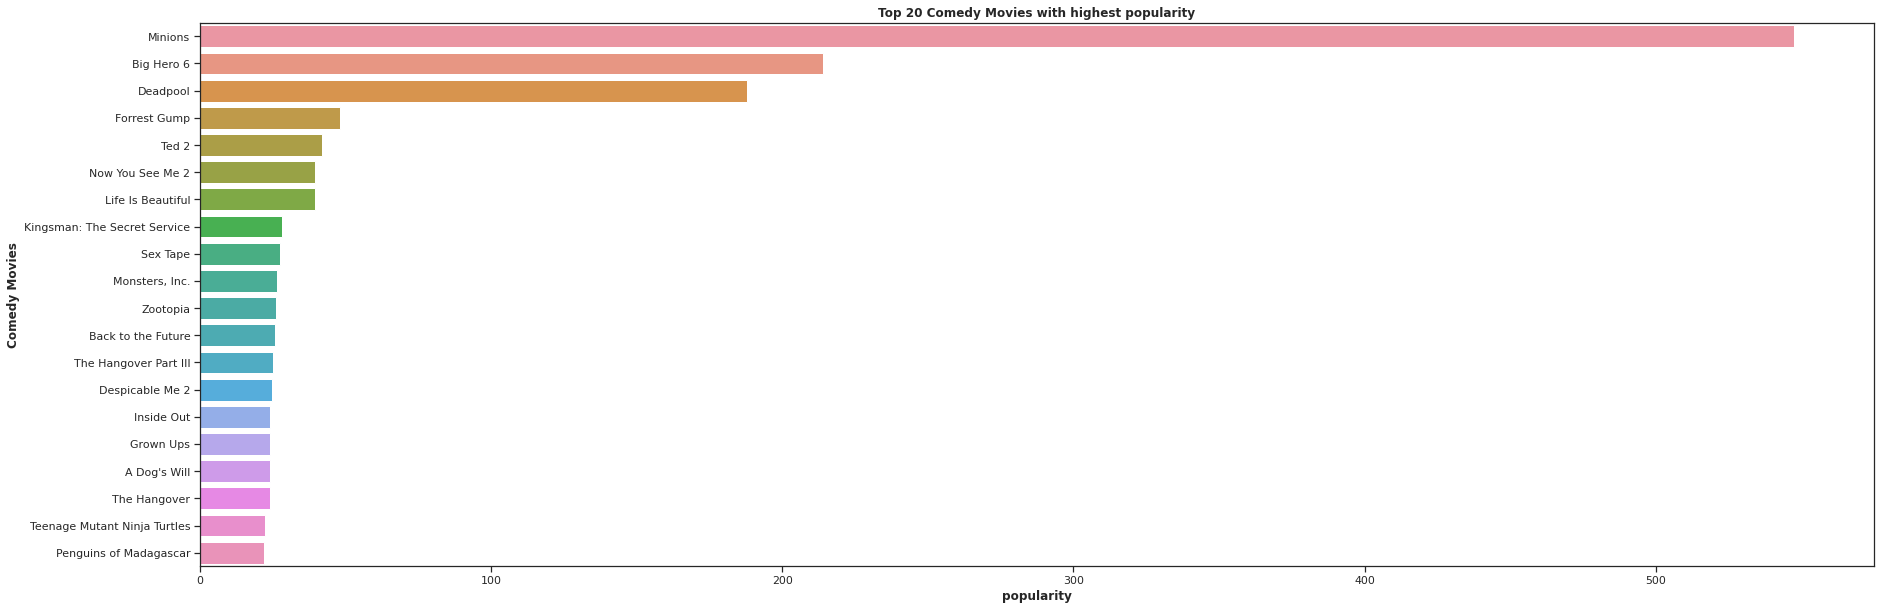

In [32]:
comedy_movies_popularity=movies_data[movies_data['genres'].str.contains('Comedy')].sort_values('popularity',ascending=False)
plt.figure(figsize=(30,10))
axis=sns.barplot(x=comedy_movies_popularity['popularity'].head(20),y=comedy_movies_popularity['title'].head(20))
plt.title('Top 20 Comedy Movies with highest popularity',weight='bold')
plt.xlabel('popularity',weight='bold')
plt.ylabel('Comedy Movies',weight='bold')
plt.savefig('ComedyMovie_popularity.jpg')

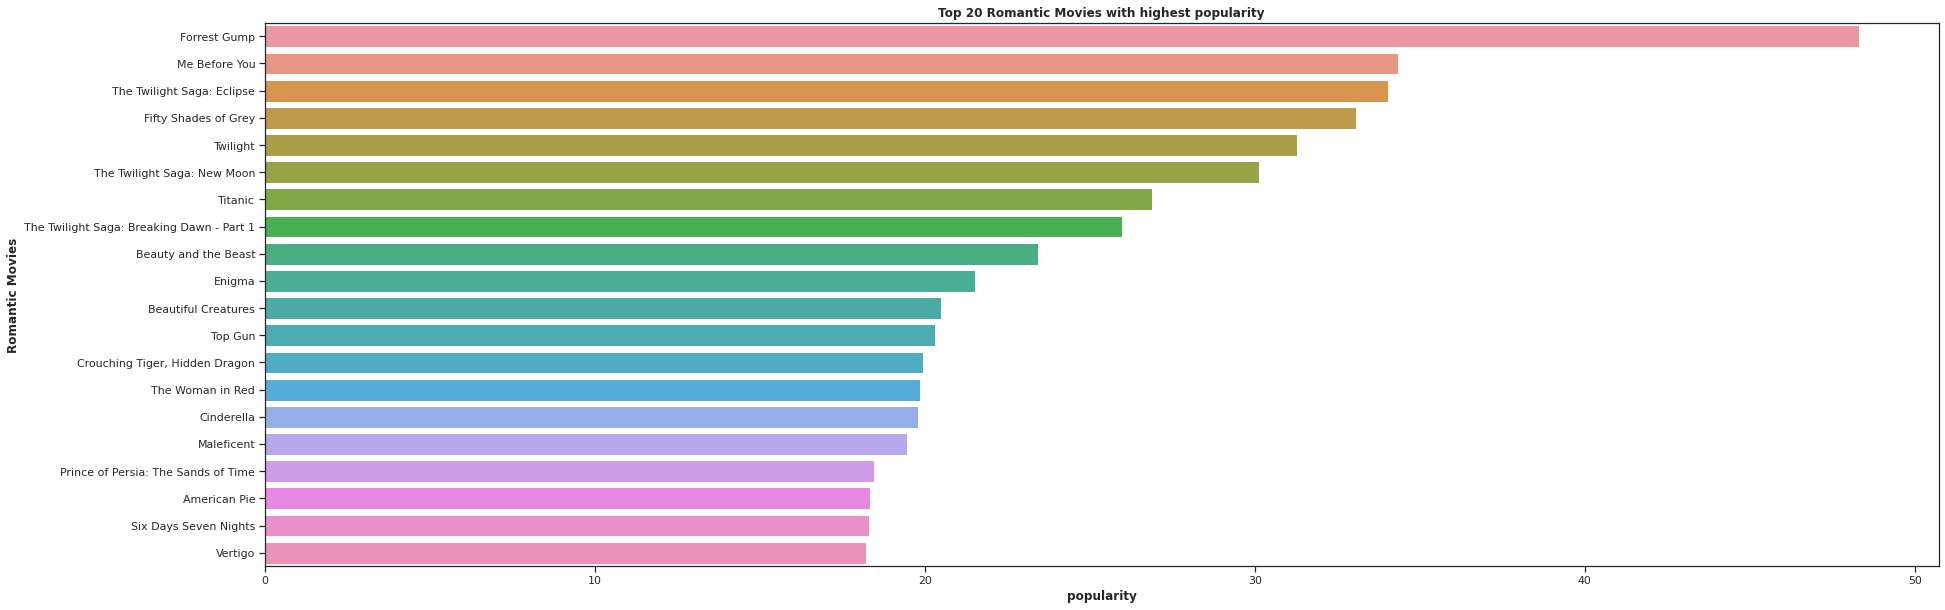

In [33]:
romantic_movies_popularity=movies_data[movies_data['genres'].str.contains('Romance')].sort_values('popularity',ascending=False)
plt.figure(figsize=(30,10))
axis=sns.barplot(x=romantic_movies_popularity['popularity'].head(20),y=romantic_movies_popularity['title'].head(20))
plt.title('Top 20 Romantic Movies with highest popularity',weight='bold')
plt.xlabel('popularity',weight='bold')
plt.ylabel('Romantic Movies',weight='bold')
plt.savefig('RomanticMovie_popularity.jpg')

**TOP 20 INDIAN MOVIES BASED ON POPULARITY COLUMN:**

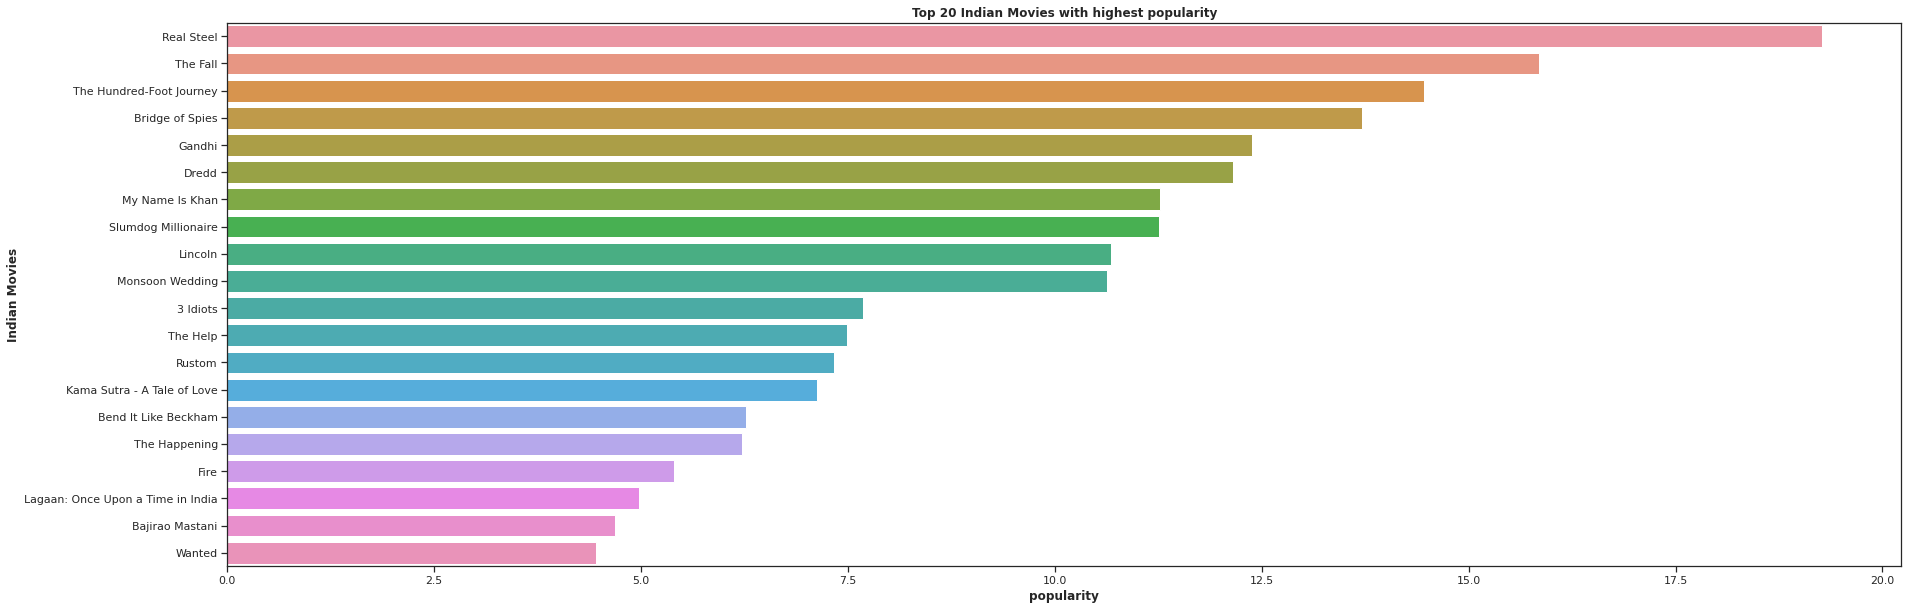

In [34]:
Indian_movies_popularity=movies_data[movies_data['production_countries'].str.contains('India')].sort_values('popularity',ascending=False)
plt.figure(figsize=(30,10))
axis=sns.barplot(x=Indian_movies_popularity['popularity'].head(20),y=Indian_movies_popularity['title'].head(20))
plt.title('Top 20 Indian Movies with highest popularity',weight='bold')
plt.xlabel('popularity',weight='bold')
plt.ylabel('Indian Movies',weight='bold')
plt.savefig('IndianMovie_popularity.jpg')

In [35]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9081 entries, 0 to 9217
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tmdbId                9081 non-null   int64  
 1   title                 9081 non-null   object 
 2   release_year          9081 non-null   int64  
 3   release_day           9081 non-null   object 
 4   genres                9081 non-null   object 
 5   original_language     9081 non-null   object 
 6   runtime               9081 non-null   float64
 7   content               9081 non-null   object 
 8   production_companies  9081 non-null   object 
 9   budget                9081 non-null   int64  
 10  revenue               9081 non-null   float64
 11  production_countries  9081 non-null   object 
 12  status                9081 non-null   object 
 13  popularity            9081 non-null   float64
 14  vote_average          9081 non-null   float64
 15  vote_count           